# Install  library from TestPypi repo [link here](https://test.pypi.org/project/neural-net-numpy/0.1.2/)
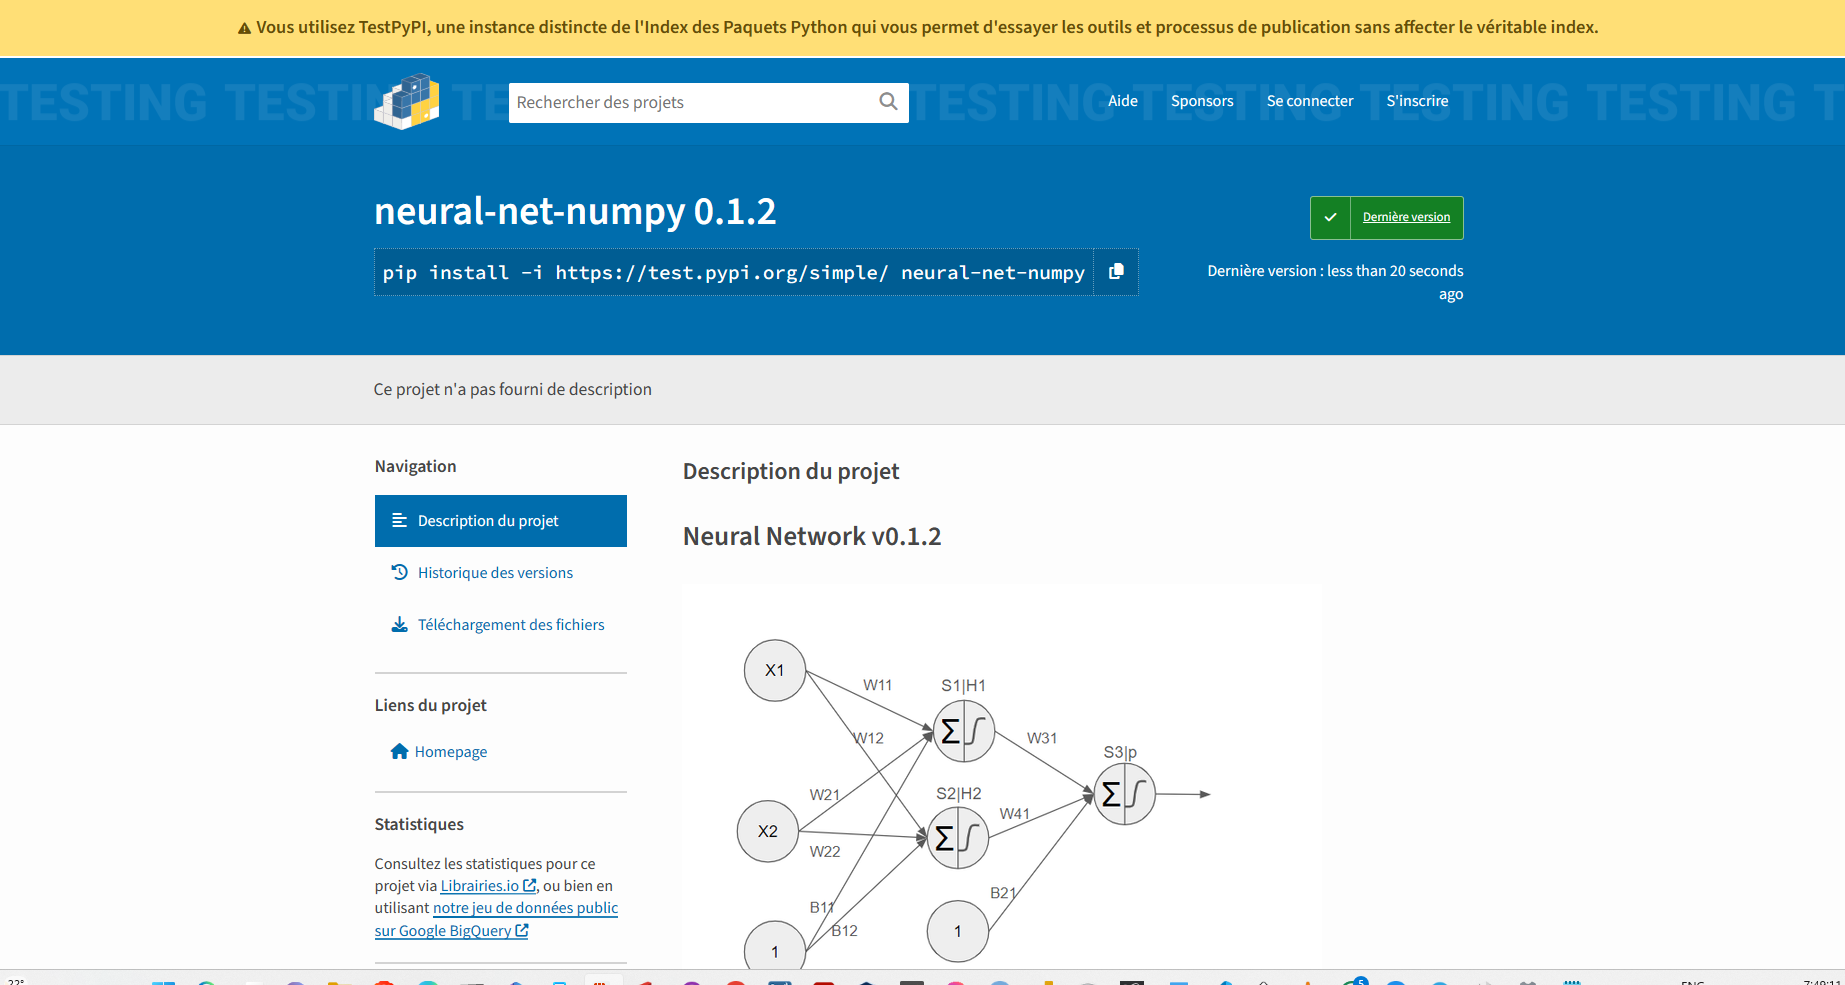

## Check python version (requirement python >=3.8)

In [1]:
!python --version

Python 3.11.7


In [17]:
!pip install --upgrade pip
!pip install -i https://test.pypi.org/simple/ neural-net-numpy==0.1.8

Looking in indexes: https://test.pypi.org/simple/


## Check install

In [18]:
!python -c "import neural_net;print(neural_net.__version__)"

0.1.0


# Import other libraries

* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >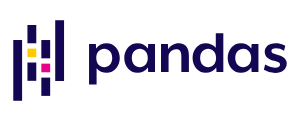</a> 
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >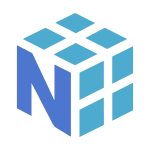</a>
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >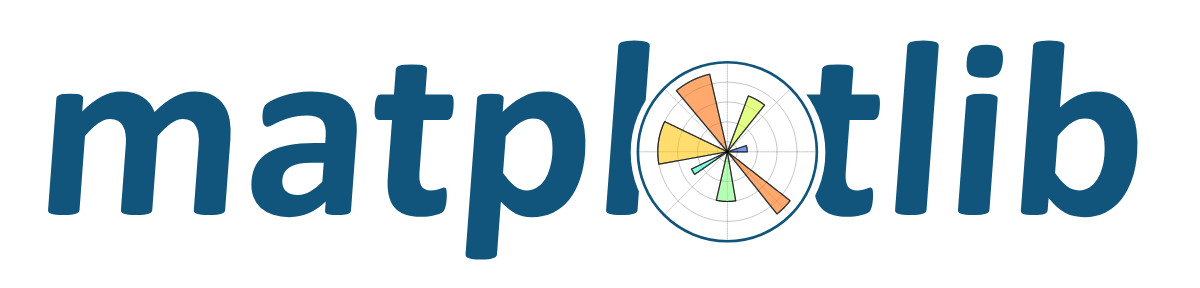</a>

In [1]:
import numpy,pandas
import matplotlib.pyplot as plt

# Activation functions

In [2]:
z = numpy.linspace(-6,6,1000+1)

## Sigmoid and Tanh

### Function values

In [3]:
from neural_net.activation import σ,Tanh

In [4]:
sigmoid = σ()
tanh    = Tanh()

In [5]:
sigmoid.compute(z)

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [6]:
tanh.compute(z)

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

In [7]:
sigmoid.preds

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [8]:
tanh.preds

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

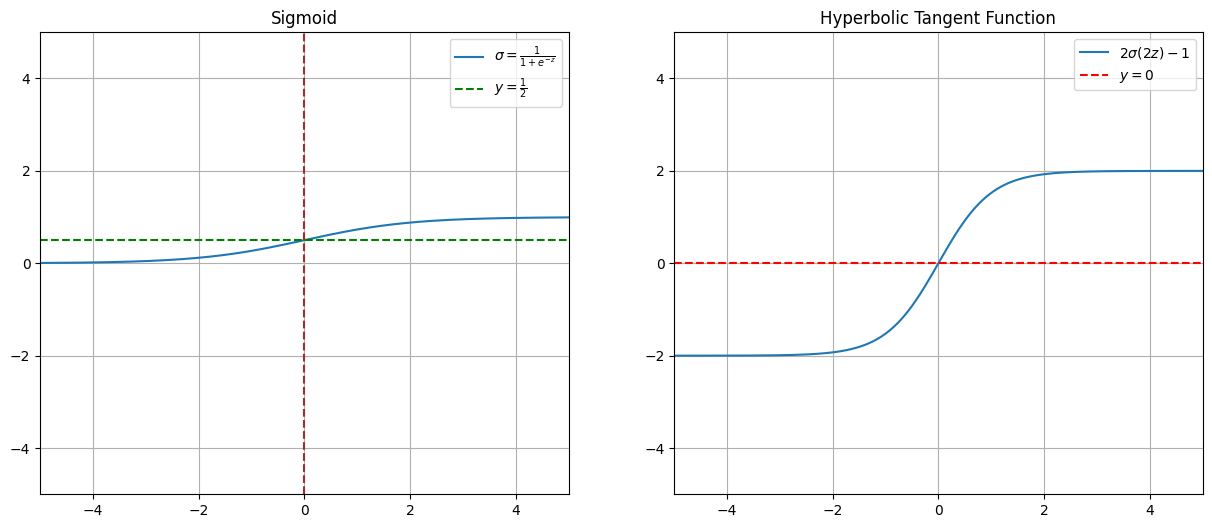

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax2.plot(z,tanh.preds,label='$2\sigma(2z) - 1$')

ax1.hlines(y=0.5,xmin=-5,xmax=5,color='green',label=r'$y=\frac{1}{2}$',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',label=r'$y=0$',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid')
ax2.set_title('Hyperbolic Tangent Function')

ax1.grid()
ax2.grid()

### Derivatives

In [10]:
sigmoidpr = sigmoid.pr()

In [11]:
tanhpr = tanh.pr()

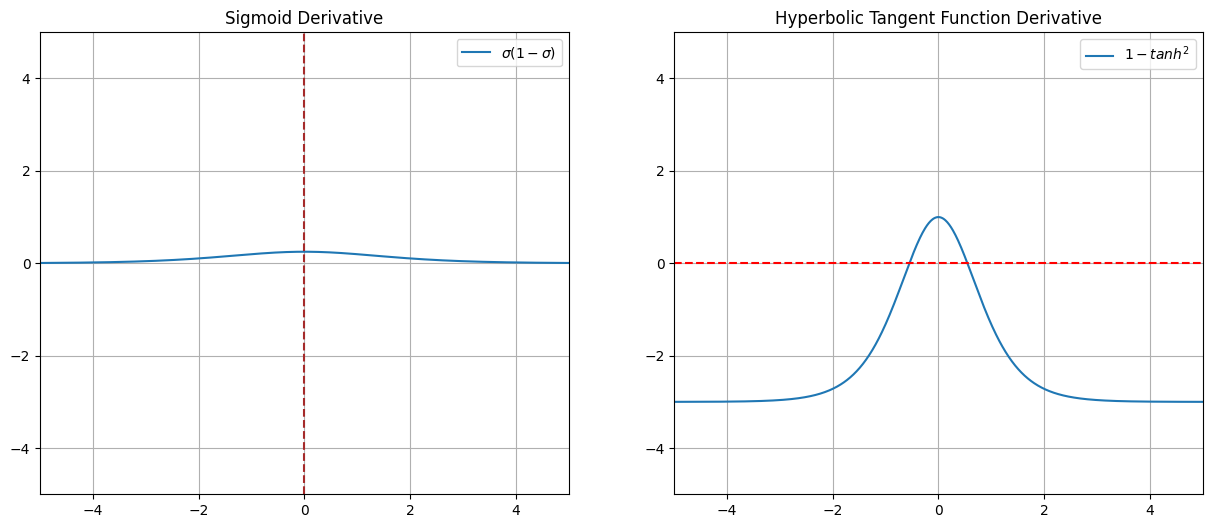

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoidpr,label=r'$\sigma(1-\sigma)$')
ax2.plot(z,tanhpr,label='$1 - tanh^2$')

ax1.hlines(y=0.25,xmin=65,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid Derivative')
ax2.set_title('Hyperbolic Tangent Function Derivative')

ax1.grid()
ax2.grid()

## Rectified Linear Unit (ReLU)

### Function values
$$
    \mathrm{\mathit{H}}(z) = \begin{cases}
        z & \text{if } z \geq 0  \\ % & is your "\tab"
        0 & \text{if } z < 0
    \end{cases}
    $$

In [13]:
from neural_net.activation import ReLU

In [14]:
relu = ReLU()

In [15]:
relupred = relu.compute(z)
relupred

array([0.   , 0.   , 0.   , ..., 5.976, 5.988, 6.   ])

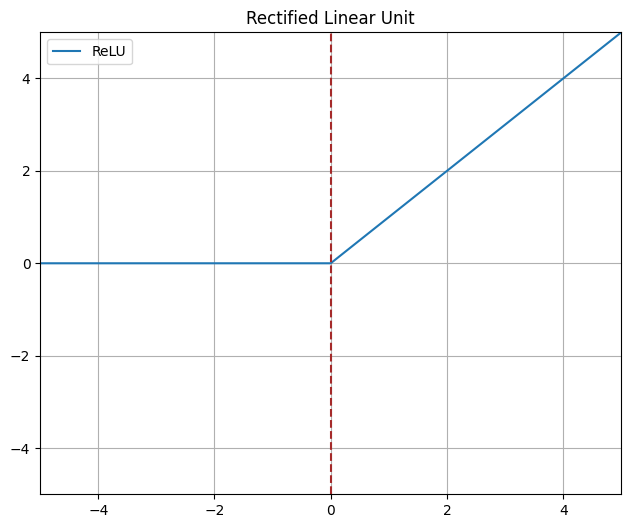

In [16]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupred,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax1.legend()

ax1.set_title('Rectified Linear Unit')

ax1.grid()

### Derivative

$$
\mathrm{\mathit{H}}(z) = \begin{cases}
1 & \text{if } z \geq 0  \\
0 & \text{if } z < 0
\end{cases}
$$

In [17]:
relupr = relu.pr()
relupr

array([0, 0, 0, ..., 1, 1, 1])

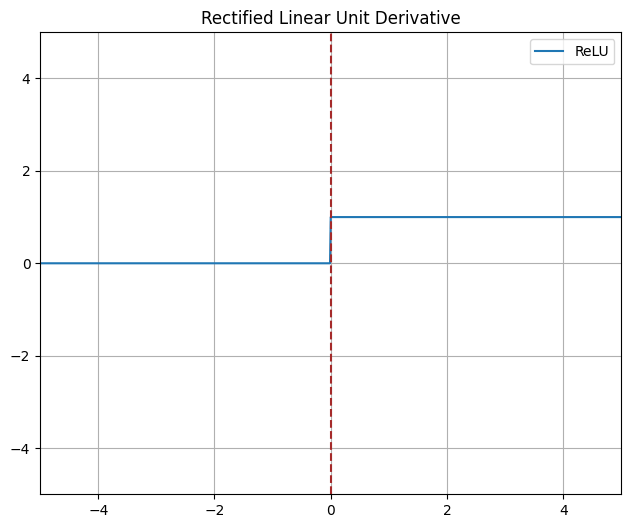

In [18]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupr,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)

ax1.legend()

ax1.set_title('Rectified Linear Unit Derivative')

ax1.grid()

## Non Saturating activations

### Function values
- Leaky Rectified Linear Unit(Leaky ReLU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
 z & \text{if }  z \geq 0  \\ 
 \alpha z & \text{if } z < 0
\end{cases}
$$

- Exponential Linear Unit(ELU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
    z & \text{if } z \geq 0  \\ 
    \alpha (e^{z} - 1) & \text{if } z < 0
\end{cases}
$$

In [19]:
from neural_net.activation import ELU,LeakyReLU

In [20]:
elu = ELU(α=1)
leakyrelu = LeakyReLU(α=.1)

In [21]:
elupred,leakyrelupred = elu.compute(z),leakyrelu.compute(z)

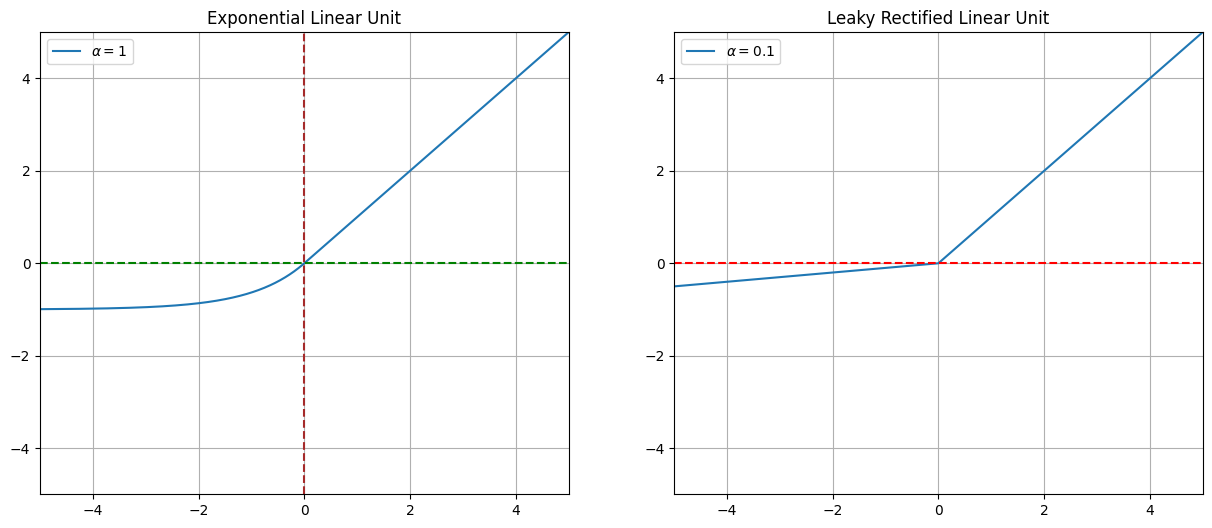

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupred,label=r'$\alpha=1$')
ax2.plot(z,leakyrelupred,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit')
ax2.set_title('Leaky Rectified Linear Unit')

ax1.grid()
ax2.grid()

### Derivatives
- ELU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \mathrm{\mathit{H}}(z) + \alpha & \text{if } z < 0
  \end{cases}
$$ 
- Leaky ReLU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \alpha & \text{if } z < 0
  \end{cases}
$$

In [23]:
elupr,leakypr = elu.pr(),leakyrelu.pr()

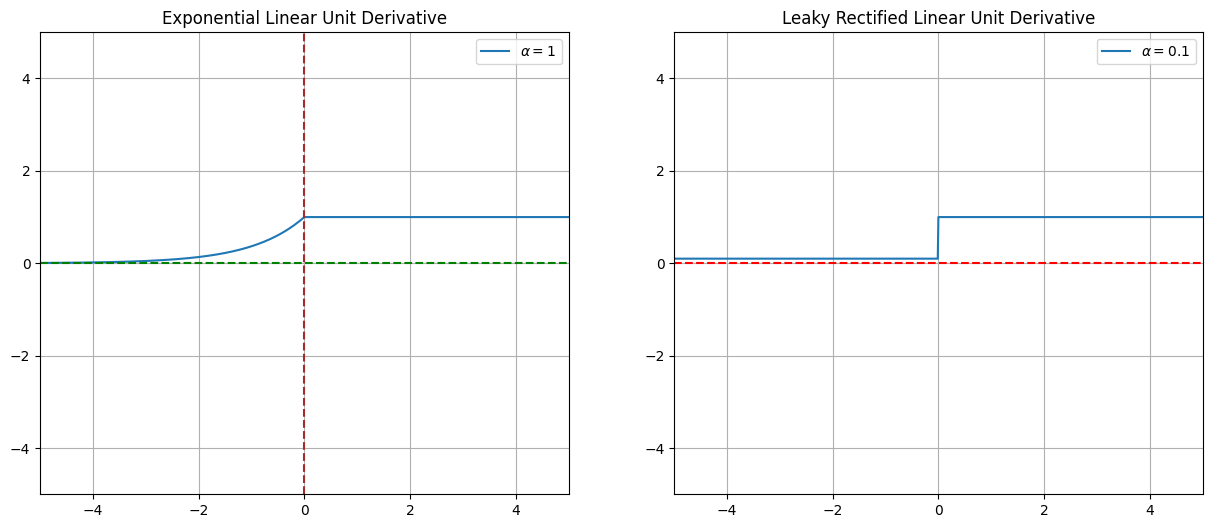

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupr,label=r'$\alpha=1$')
ax2.plot(z,leakypr,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit Derivative')
ax2.set_title('Leaky Rectified Linear Unit Derivative')

ax1.grid()
ax2.grid()

## All common activation function and their derivatives

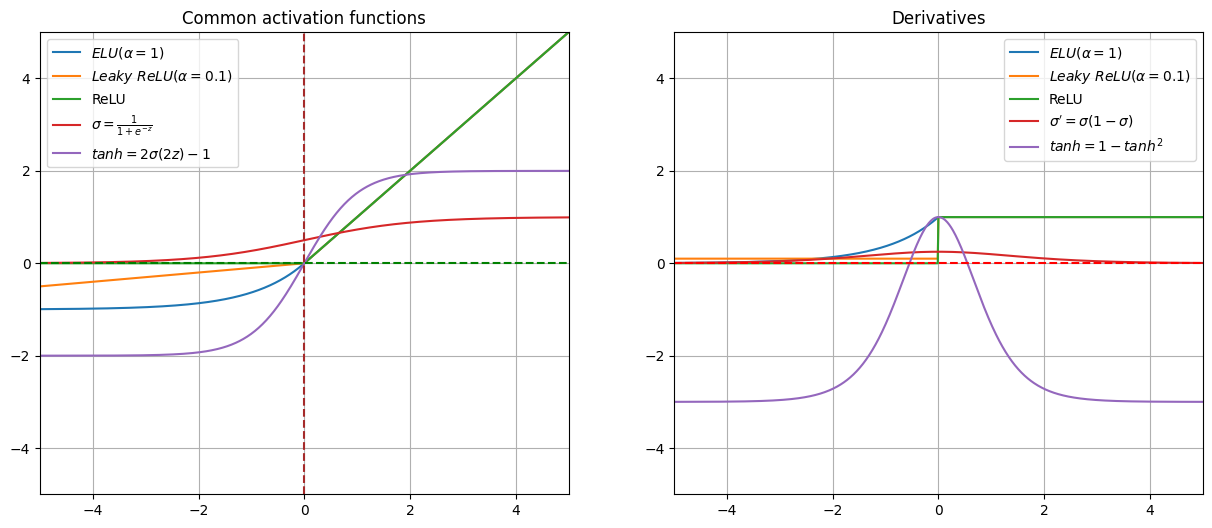

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elu.preds,label=r'$ELU(\alpha=1)$')
ax1.plot(z,leakyrelu.preds,label=r'$Leaky\ ReLU(\alpha=0.1)$')
ax1.plot(z,relu.preds,label=r'ReLU')
ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax1.plot(z,tanh.preds,label='$tanh=2\sigma(2z) - 1$')


ax2.plot(z,elupr,label=r'$ELU(\alpha=1)$')
ax2.plot(z,leakypr,label=r'$Leaky\ ReLU(\alpha=0.1$)')
ax2.plot(z,relupr,label=r'ReLU')
ax2.plot(z,sigmoidpr,label=r"$\sigma'=\sigma(1-\sigma)$")
ax2.plot(z,tanhpr,label='$tanh=1 - tanh^2$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Common activation functions')
ax2.set_title('Derivatives')

ax1.grid()
ax2.grid()

# Initialization

In [26]:
from neural_net.init_funcs import XavierHe, zeros

## Weights + Bias

In [34]:
n_cols = 2

### Zeros

In [35]:
W = zeros(n_cols,1)
W

array([[0.],
       [0.],
       [0.]])

In [36]:
W = zeros(n_cols,1,biais=False)
W

array([[0.],
       [0.]])

## Xavier and He

<a href="https://imgbb.com/"><img src="https://i.ibb.co/FHwxjmL/Screenshot-2024-03-03-084231.png" alt="Screenshot-2024-03-03-084231" border="0"></a>


In [37]:
initializer = XavierHe("Normal","Sigmoid").init_func

In [38]:
initializer(n_cols,1)

array([[ 1.08529782],
       [ 0.55315106],
       [-1.20349346]])

In [39]:
initializer(n_cols,1,biais=False)

array([[0.14914699],
       [0.68662846]])

### Normal distribution

In [105]:
n_cols = 1000

In [106]:
xe_norm_sigmoid = XavierHe("Normal","Sigmoid").init_func(n_cols,1,biais=False)
xe_norm_tanh = XavierHe("Normal","Tanh").init_func(n_cols,1,biais=False)
xe_norm_relu = XavierHe("Normal","ReLU").init_func(n_cols,1,biais=False)


In [107]:
xe_norm_sigmoid.shape

(1000, 1)

In [108]:
std,m = xe_norm_sigmoid.std(),xe_norm_sigmoid.mean()
std,m

(0.04489498522857033, -0.0007231213204853488)

In [109]:
(( xe_norm_sigmoid >= m-std) & (xe_norm_sigmoid<=m+std)).sum()

697

In [113]:
697/n_cols

0.697

In [114]:
(( xe_norm_sigmoid >= m-2*std) & (xe_norm_sigmoid<=m+2*std)).sum()/n_cols

0.95

In [115]:
(( xe_norm_sigmoid >= m-3*std) & (xe_norm_sigmoid<=m+3*std)).sum()/n_cols

0.997

In [116]:
xe_norm_tanh.std(),xe_norm_relu.std()

(0.1711681672411125, 0.06410140383405528)

(-0.726385463544662, 0.6217518101350396, 0.0, 111.3)

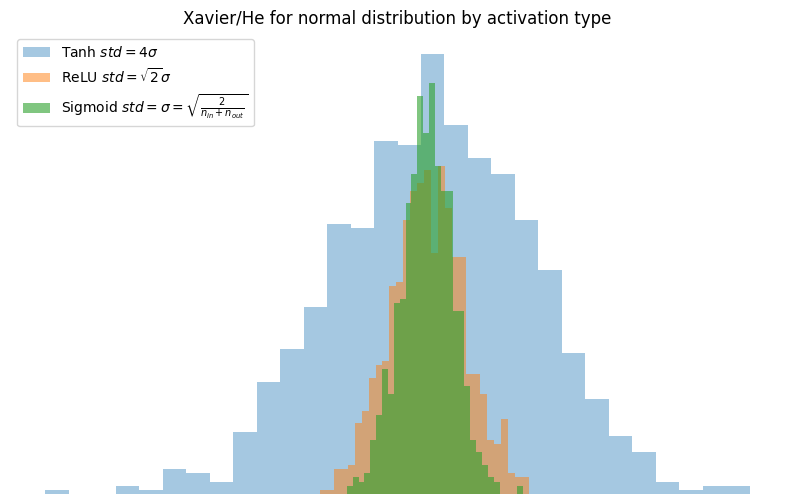

In [130]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for normal distribution by activation type')
plt.hist(xe_norm_tanh,label=r'Tanh $std=4\sigma$',bins=30,alpha=.4)
plt.hist(xe_norm_relu,label=r'ReLU $std=\sqrt{2}\sigma$',bins=30,alpha=.5)
plt.hist(xe_norm_sigmoid,label=r'Sigmoid $std=\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=30,alpha=.6)

plt.legend(loc='upper left')
plt.axis('off')

### Uniform distribution

In [128]:
xe_uni_sigmoid = XavierHe("Uniform","Sigmoid").init_func(n_cols,1,biais=False)
xe_uni_tanh = XavierHe("Uniform","Tanh").init_func(n_cols,1,biais=False)
xe_uni_relu = XavierHe("Uniform","ReLU").init_func(n_cols,1,biais=False)


In [135]:
xe_uni_sigmoid.min()

-0.07708092487365578

In [136]:
xe_uni_sigmoid.max()

0.0770798990273792

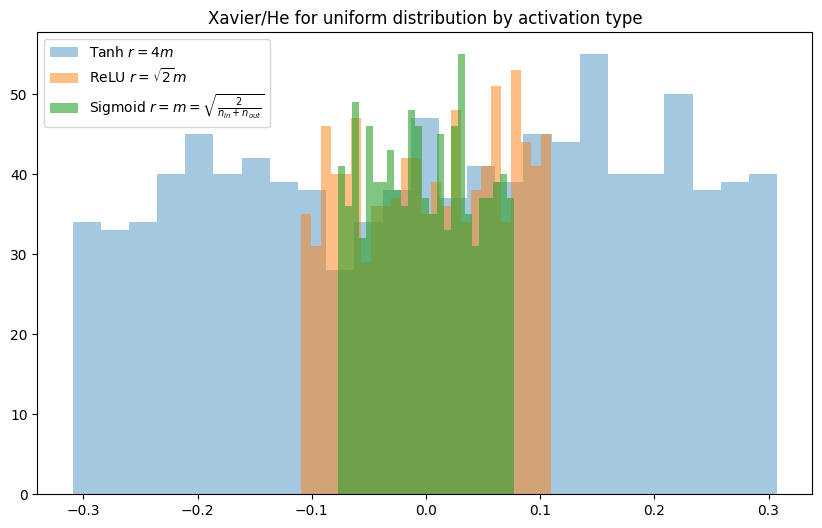

In [140]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for uniform distribution by activation type')
plt.hist(xe_uni_tanh,label=r'Tanh $r=4m$',bins=25,alpha=.4)
plt.hist(xe_uni_relu,label=r'ReLU $r=\sqrt{2}m$',bins=25,alpha=.5)
plt.hist(xe_uni_sigmoid,label=r'Sigmoid $r=m=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=25,alpha=.6)

plt.legend(loc='upper left')


# Layers

In [142]:
from neural_net.layers import Fullyconnected,Activation


## Linear Layer

In [158]:
fc = Fullyconnected(n_in=2,n_out=1,init_method=zeros)

In [159]:
repr(fc)

'Fullyconnected'

In [160]:
str(fc)

'Layer'

In [161]:
fc.id

{'id': 140377909934032,
 'Layer_id': 140377909934032,
 'name': 'Fullyconnected',
 'self': Fullyconnected,
 'n_in': 2,
 'n_out': 1,
 'init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'func': neural_net.activation.Σ,
 'steps': []}

In [162]:
fc['id']

140377909934032

In [163]:
fc.id['id']

140377909934032

In [164]:
fc.func

Σ

## Linear activation

In [166]:
linear_activation = fc.func
linear_activation

Σ

In [167]:
str(linear_activation)

'Neurons'

In [168]:
repr(linear_activation)

'Σ'

In [169]:
linear_activation.id

{'id': 140377909866128,
 'Neurons_id': 140377909866128,
 'name': 'Σ',
 'self': Σ,
 'Layer_id': 140377909934032,
 'Layer_Layer_id': 140377909934032,
 'Layer_name': 'Fullyconnected',
 'Layer_self': Fullyconnected,
 'Layer_n_in': 2,
 'Layer_n_out': 1,
 'Layer_init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'Layer_func': neural_net.activation.Σ,
 'steps': []}

In [170]:
linear_activation.W

array([[0.],
       [0.],
       [0.]])

In [171]:
linear_activation.W.shape

(3, 1)

## activation layer

In [172]:
sigmoid_activation = Activation(func=σ)

In [173]:
sigmoid_activation

Activation

In [174]:
str(sigmoid_activation)

'Layer'

In [175]:
sigmoid_activation.id

{'id': 140377909680656,
 'Layer_id': 140377909680656,
 'name': 'Activation',
 'self': Activation,
 'func': neural_net.activation.σ,
 'kargs': (),
 'steps': []}

# Architecture

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ
from neural_net.cost import BinaryCrossEntropy

In [2]:
network = Sequential(
        [
        Fullyconnected(2,10,zeros),
        Activation(σ),
        Fullyconnected(10,1,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy)

In [3]:
repr(network)

'Sequential'

In [4]:
str(network)

'Architecture'

In [6]:
network['steps']

[Fullyconnected, Activation, Fullyconnected, Activation]

In [7]:
network.id.keys()

dict_keys(['id', 'Architecture_id', 'name', 'self', 'steps', 'cost', 'store'])

In [8]:
network['id']

140379602988880

In [9]:
network.id['id']

140379602988880

# Adding Database

In [13]:
network = Sequential(
        [
        Fullyconnected(2,50,zeros),
        Activation(σ),
        Fullyconnected(50,2,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy,store=True)

In [14]:
network.session

In [15]:
network.db_path

'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db'

In [21]:
utc_ts = network.db_path.split('/')[-1][5:-3]
utc_ts

'1709575905'

In [20]:
import datetime

In [24]:
datetime.datetime.fromtimestamp(int(utc_ts)).isoformat()

'2024-03-04T18:11:45'

In [31]:
db_folder = '/'.join(network.db_path.split('/')[3:-1])
db_folder

'/home/analyst/notebooks/module/neural_net/run'

In [32]:
%ls  $db_folder/*db|tail -n 3

/home/analyst/notebooks/module/neural_net/run/model1709575470.db
/home/analyst/notebooks/module/neural_net/run/model1709575647.db
/home/analyst/notebooks/module/neural_net/run/model1709575905.db


In [37]:
network.engines

{'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db': Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)}

In [38]:
network.engines.get(network.db_path)

Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)

In [43]:
cursor = network.engines.get(network.db_path).connect()

In [44]:
from sqlalchemy import text

In [48]:

res = cursor.execute(text('''

        SELECT * 
        FROM
        sqlite_schema

'''))
pandas.DataFrame(res.fetchall())

,type,name,tbl_name,rootpage,sql
0,table,Architecture,Architecture,2,"CREATE TABLE ""Architecture"" (\n\tid INTEGER NO..."
1,table,Layer,Layer,3,"CREATE TABLE ""Layer"" (\n\t""Architecture_id"" IN..."
2,table,Cost,Cost,4,"CREATE TABLE ""Cost"" (\n\t""Architecture_id"" INT..."
3,table,Neurons,Neurons,5,"CREATE TABLE ""Neurons"" (\n\t""Layer_id"" INTEGER..."
4,table,Weight,Weight,6,"CREATE TABLE ""Weight"" (\n\tvalue INTEGER, \n\t..."


# Forward Feeding data to network

## Generating Linearly seperable data

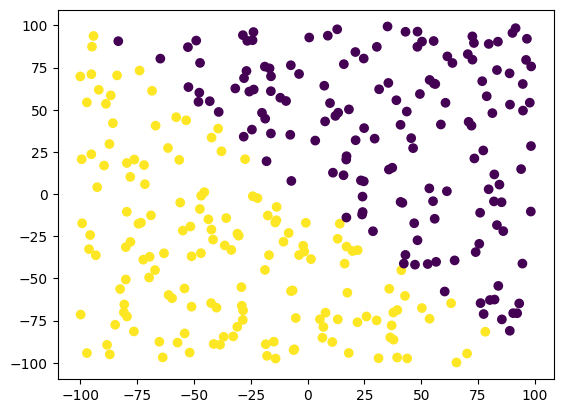

In [49]:
n,k = 300,2
X = numpy.random.uniform(-100,100,size=(n,k))
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)


## Looping over layers

In [50]:
for layer in network:
    print(repr(layer))

Fullyconnected
Activation
Fullyconnected
Activation


In [51]:
layer.func

σ

In [52]:
out = X
for layer in network:
    out = layer.func.compute(out)

In [54]:
out

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [56]:
out.shape

(300, 2)

## Using predict method

In [55]:
network.predict(X)
network.out.shape

(300, 2)

# Exploring database

In [57]:
%load_ext sql
%sql $network.db_path

## Architecture

In [65]:
%%sql

SELECT *
FROM Architecture

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


id,created_at,updated_at,name,Architecture_id
1,2024-03-04 18:11:45.895299,2024-03-04 18:11:45.895302,Sequential,140379602670032
2,2024-03-04 18:17:26.316307,2024-03-04 18:17:26.316315,Sequential,140379603024400


In [66]:
network['id']

140379603024400

## Costs

In [70]:
%%sql

SELECT *
FROM cost
WHERE Architecture_id = 140379603024400

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Architecture_id,value,id,created_at,updated_at,name,Cost_id
140379603024400,None,2,2024-03-04 18:17:26.591265,2024-03-04 18:17:26.591271,BinaryCrossEntropy,140379601731216


## Layers

In [63]:
%%sql   

SELECT * 
FROM layer 
WHERE Architecture_id=140379603024400

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Architecture_id,n_in,n_out,id,created_at,updated_at,name,Layer_id
140379603024400,2,50,5,2024-03-04 18:17:26.327160,2024-03-04 18:17:26.327167,Fullyconnected,140379603033872
140379603024400,None,None,6,2024-03-04 18:17:26.327168,2024-03-04 18:17:26.513963,Activation,140379602907280
140379603024400,50,2,7,2024-03-04 18:17:26.327169,2024-03-04 18:17:26.547988,Fullyconnected,140379601709072
140379603024400,None,None,8,2024-03-04 18:17:26.327170,2024-03-04 18:17:26.572231,Activation,140379601815760


## Neurons

In [64]:
%%sql   

SELECT * 
FROM neurons 
WHERE layer_id=140379603033872

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Layer_id,id,created_at,updated_at,name,Neurons_id
140379603033872,1,2024-03-04 18:17:26.330924,2024-03-04 18:17:26.330930,Σ,140379601518480


## Weights

In [83]:
%%sql

SELECT * 
FROM
weight WHERE neurons_id = 140379601518480
LIMIT 10

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


value,Neurons_id,id,created_at,updated_at,name,Weight_id
0,140379601518480,1,2024-03-04 18:17:26.341093,2024-03-04 18:17:26.341100,None,0_0
0,140379601518480,2,2024-03-04 18:17:26.341101,2024-03-04 18:17:26.341102,None,0_1
0,140379601518480,3,2024-03-04 18:17:26.341102,2024-03-04 18:17:26.341103,None,0_2
0,140379601518480,4,2024-03-04 18:17:26.341104,2024-03-04 18:17:26.341104,None,0_3
0,140379601518480,5,2024-03-04 18:17:26.341105,2024-03-04 18:17:26.341105,None,0_4
0,140379601518480,6,2024-03-04 18:17:26.341106,2024-03-04 18:17:26.341106,None,0_5
0,140379601518480,7,2024-03-04 18:17:26.341107,2024-03-04 18:17:26.341107,None,0_6
0,140379601518480,8,2024-03-04 18:17:26.341108,2024-03-04 18:17:26.341108,None,0_7
0,140379601518480,9,2024-03-04 18:17:26.341109,2024-03-04 18:17:26.341109,None,0_8
0,140379601518480,10,2024-03-04 18:17:26.341110,2024-03-04 18:17:26.341110,None,0_9


In [85]:
%%sql

SELECT count(*) n_neurons, AVG(value) mean_value
FROM
weight WHERE neurons_id = 140379601518480

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


n_neurons,mean_value
150,0.0


# Predict Method

In [86]:
network.predict(X)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

# Cost functions

In [1]:
from neural_net.cost import BinaryCrossEntropy, CrossEntropy, MSE
from neural_net.utils import make_circle_data,IrisDatasetDownloader,HouseDatasetDownloader,Pearson,Boostrap
import numpy
import matplotlib.pyplot as plt

## Binary Crossentropy
$$
\mathrm{\mathit{Binary\ Cross\ Entropy}}(p, y) = \begin{cases}
-\log(p) & \text{if } y = 1, \\
-\log(1-p) & \text{otherwise.}
\end{cases}
$$

In [2]:
bcost = BinaryCrossEntropy()

### Circles dataset

(328, 2) (328, 1)


(-100.0, 100.0)

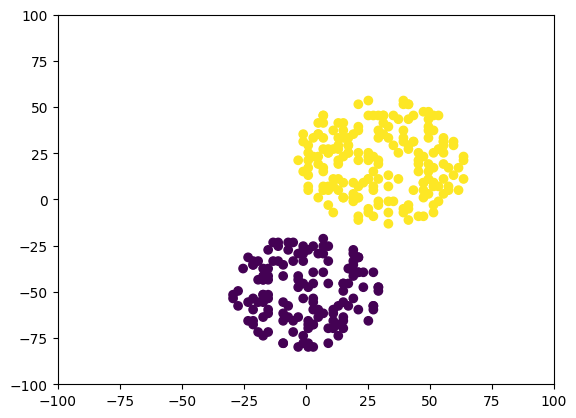

In [3]:
centers = [(-50, 0), (20, 30)]
radii = [30, 35]
X, y = make_circle_data(centers, radii)
print(X.shape, y.shape)
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

In [4]:
dum_classifier = numpy.random.random(len(y))
dum_classifier.shape

(328,)

In [5]:
bcost.compute(y,dum_classifier)

0.9439193222155523

In [6]:
round(bcost.compute(y,y))

0

### Properties

#### With clipped values( default clip=True)

In [7]:
ps = numpy.linspace(0,1,1000).reshape(-1,1)
y1 = numpy.array([ [[bcost.compute(numpy.array([1]),p)],bcost.pr()] for p in ps ])
y0 = numpy.array([ [[bcost.compute(numpy.array([0]),p)],bcost.pr()] for p in ps ])

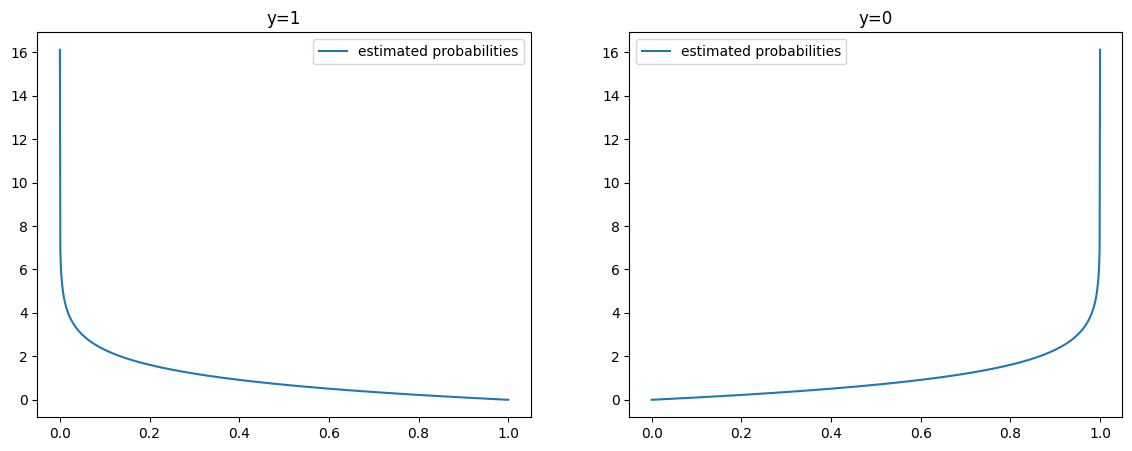

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps,y1[:,0],label='estimated probabilities')
ax2.set_title('y=0')
ax2.plot(ps,y0[:,0],label='estimated probabilities')
ax1.legend()
ax2.legend()

##### Derivaties

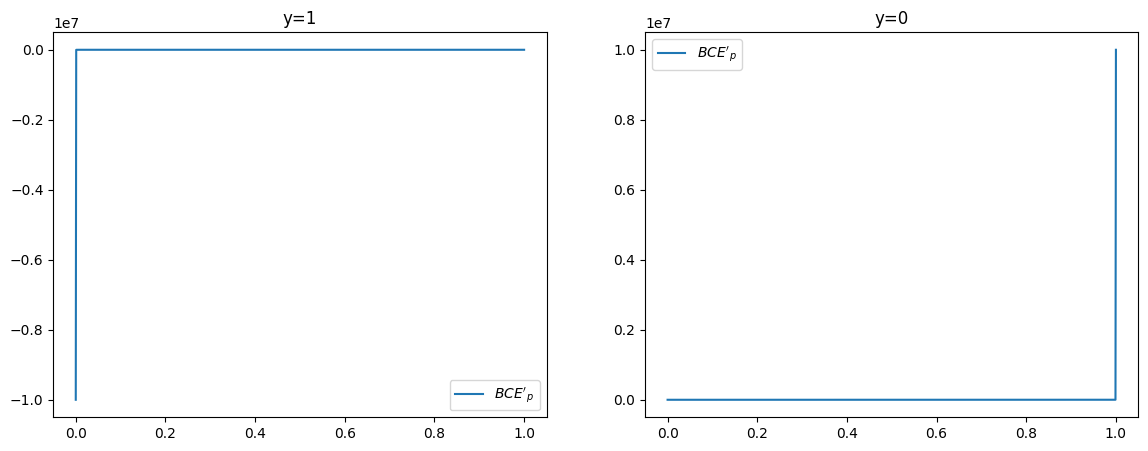

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps,y1[:,1],label="$BCE'_{p}$")
ax2.set_title('y=0')
ax2.plot(ps,y0[:,1],label="$BCE'_{p}$")
ax1.legend()
ax2.legend()

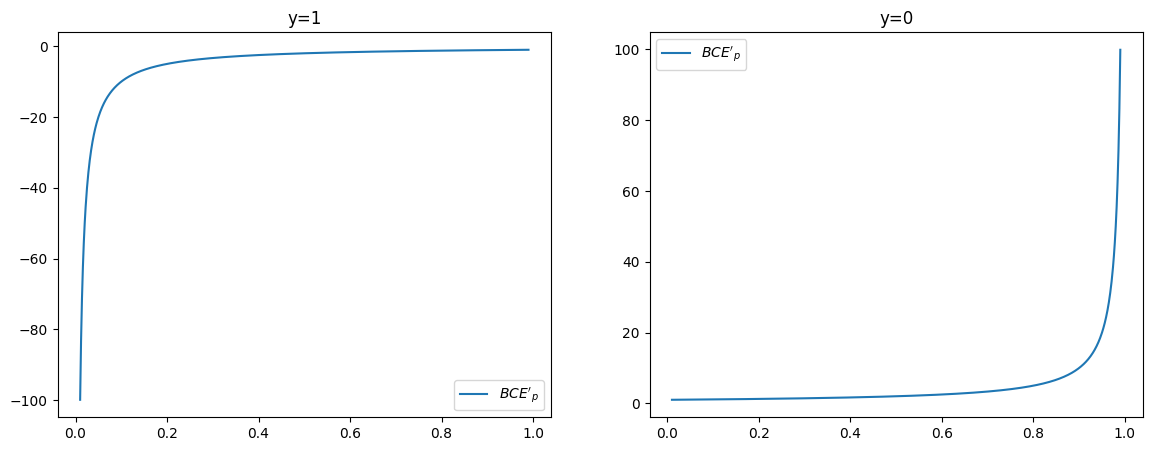

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps[10:-10,:],y1[10:-10,1],label="$BCE'_{p}$")
ax2.set_title('y=0')
ax2.plot(ps[10:-10,:],y0[10:-10:,1],label="$BCE'_{p}$")
ax1.legend()
ax2.legend()

#### Without clippping

In [11]:
ps = numpy.linspace(1e-9,1-1e-9,1000).reshape(-1,1)
y1 = numpy.array([ [[bcost.compute(numpy.array([1]),p,clip=False)],bcost.pr()] for p in ps ])
y0 = numpy.array([ [[bcost.compute(numpy.array([0]),p,clip=False)],bcost.pr()] for p in ps ])

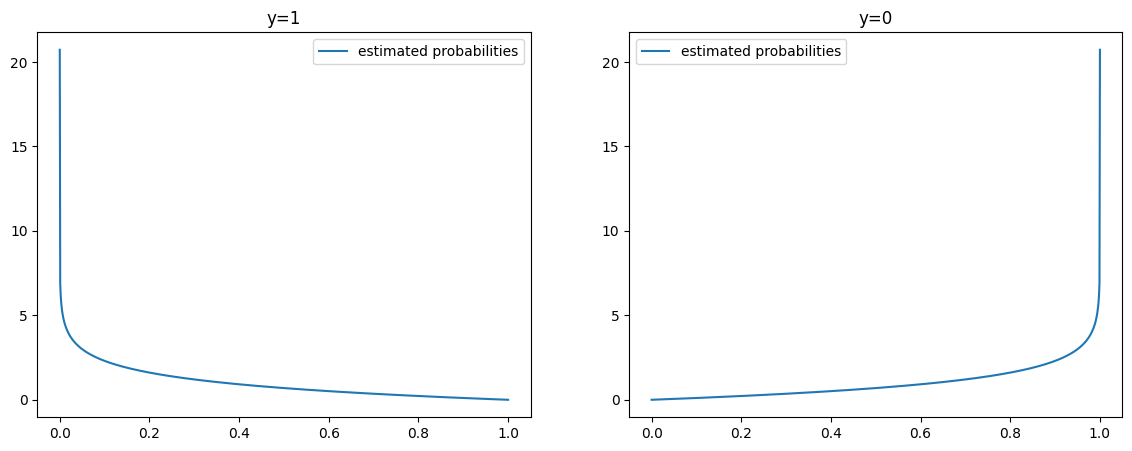

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps,y1[:,0],label='estimated probabilities')
ax2.set_title('y=0')
ax2.plot(ps,y0[:,0],label='estimated probabilities')
ax1.legend()
ax2.legend()

##### Derivaties

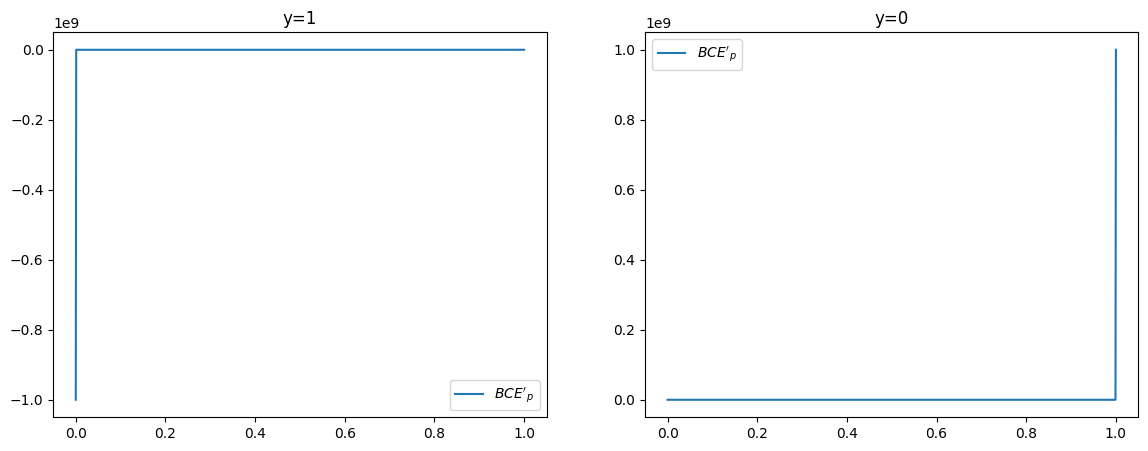

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps,y1[:,1],label="$BCE'_{p}$")
ax2.set_title('y=0')
ax2.plot(ps,y0[:,1],label="$BCE'_{p}$")
ax1.legend()
ax2.legend()

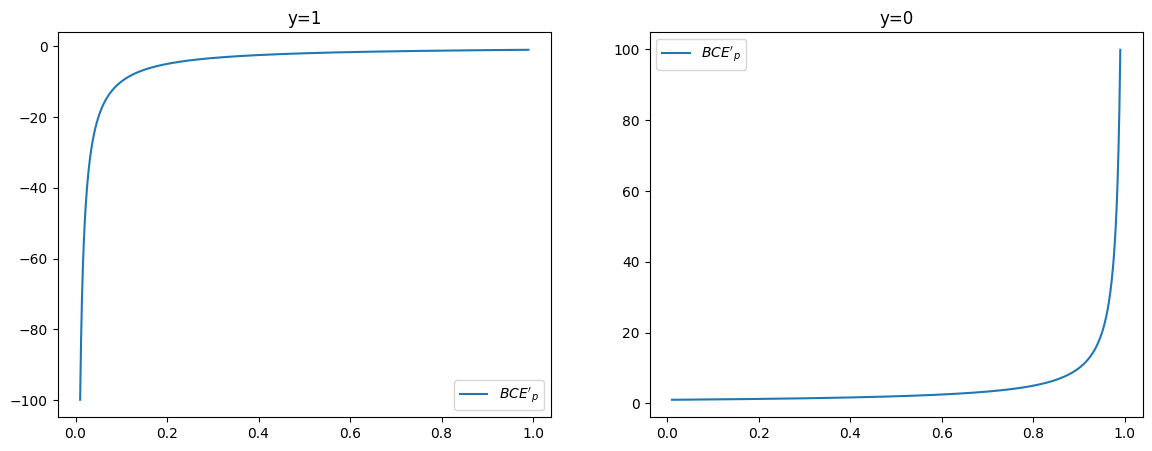

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('y=1')
ax1.plot(ps[10:-10,:],y1[10:-10,1],label="$BCE'_{p}$")
ax2.set_title('y=0')
ax2.plot(ps[10:-10,:],y0[10:-10:,1],label="$BCE'_{p}$")
ax1.legend()
ax2.legend()

## Cross Entropy

In [196]:
ce = CrossEntropy()

### Iris dataset

In [197]:
iris = IrisDatasetDownloader()
iris.load_dataset()


In [198]:
print(iris.description)


        1. Title: Iris Plants Database
            Updated Sept 21 by C.Blake - Added discrepency information

        2. Sources:
            (a) Creator: R.A. Fisher
            (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
            (c) Date: July, 1988

        3. Past Usage:
            - Publications: too many to mention!!!  Here are a few.
        1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
            Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
            to Mathematical Statistics" (John Wiley, NY, 1950).
        2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
            (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
        3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
            Structure and Classification Rule for Recognition in Partially Exposed
            Environments".  IEEE Transactions on Pattern Analysis and Machine
        

In [199]:
print(iris.data.shape,iris.target.shape)

(150, 4) (150, 1)


In [200]:
print(iris.target_names)

['setosa', 'versicolor', 'virginica']


In [201]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [202]:
print(iris.data[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [203]:
print(iris.target[:5,:])

[[0]
 [0]
 [0]
 [0]
 [0]]


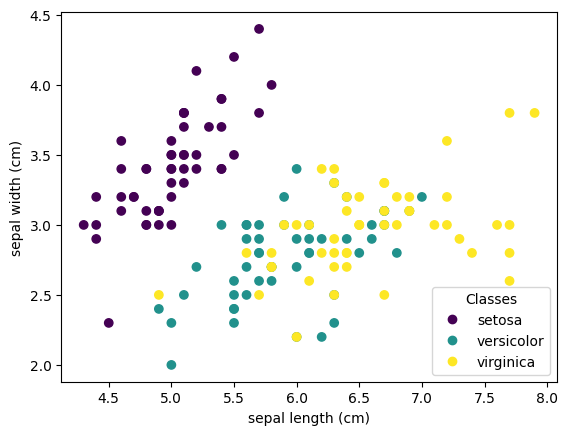

In [204]:

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [205]:
dum_classifier = numpy.random.random((len(iris.target),3))
dum_classifier/=dum_classifier.sum(axis=1,keepdims=True)
print(dum_classifier.shape)
dum_classifier[:5,:]

(150, 3)


array([[0.30771342, 0.63291054, 0.05937604],
       [0.19948573, 0.3398386 , 0.46067567],
       [0.42137261, 0.06943003, 0.50919737],
       [0.08200258, 0.60102031, 0.31697711],
       [0.27441097, 0.40437459, 0.32121444]])

In [206]:
from neural_net.pipeline import onehot

In [207]:
y = onehot(iris.target)
print(y.shape)
y[:5,:]

(150, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [208]:
ce.compute(y,dum_classifier)

1.2920221019539604

In [209]:
round(ce.compute(y,y))

0

### Properties

#### binary case : 2 labels

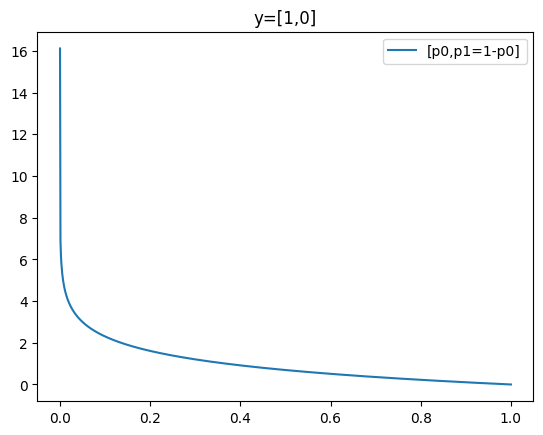

In [210]:
ps = numpy.linspace(1e-9,1-1e-9,1000).reshape(-1,1)

y1,pr = [],[]

for p in ps:
    y1.append(ce.compute(numpy.array([[1,0]]),numpy.c_[p,1-p]))
    pr.append(ce.pr()[0])

fig,ax1 = plt.subplots()
plt.title('y=[1,0]')
ax1.plot(ps,y1,label='[p0,p1=1-p0]')
ax1.legend()

In [211]:
pr=numpy.array(pr)
pr.shape

(1000, 2)

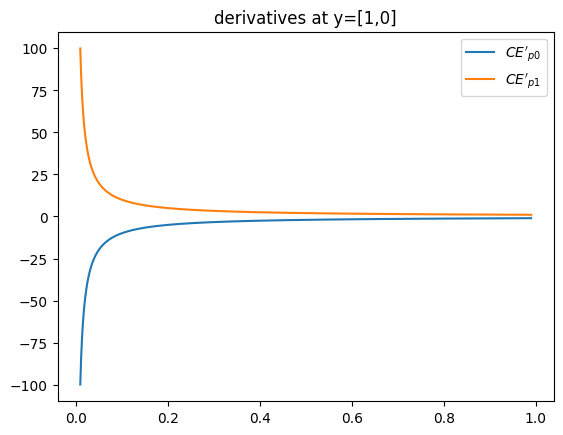

In [212]:
fig,ax1 = plt.subplots()
ax1.set_title('derivatives at y=[1,0]')
ax1.plot(ps[10:-10,:],pr[10:-10,0],label=r"$CE'_{p0}$")
ax1.plot(ps[10:-10,:],pr[10:-10,1],label=r"$CE'_{p1}$")
plt.legend()

#### Multimodal case : 3+ labels

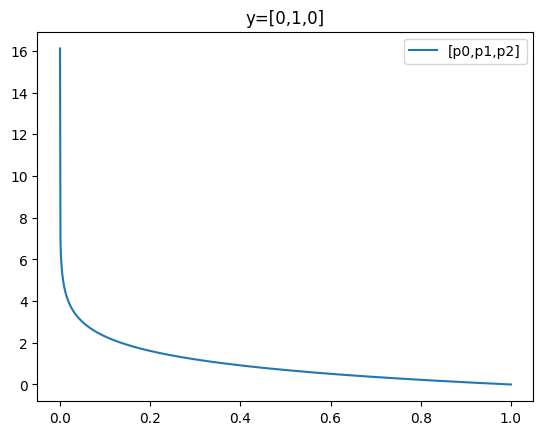

In [213]:
ps = numpy.linspace(1e-9,1-1e-9,1000).reshape(-1,1)


y1,pr = [],[]

for p in ps:
    y1.append(ce.compute(numpy.array([[0,1,0]]),numpy.c_[(1-p)*2/3,p,(1-p)/3]))
    pr.append(ce.pr()[0])

fig,ax1 = plt.subplots()
plt.title('y=[0,1,0]')
ax1.plot(ps,y1,label='[p0,p1,p2]')
ax1.legend()

In [214]:
pr=numpy.array(pr)
pr.shape

(1000, 3)

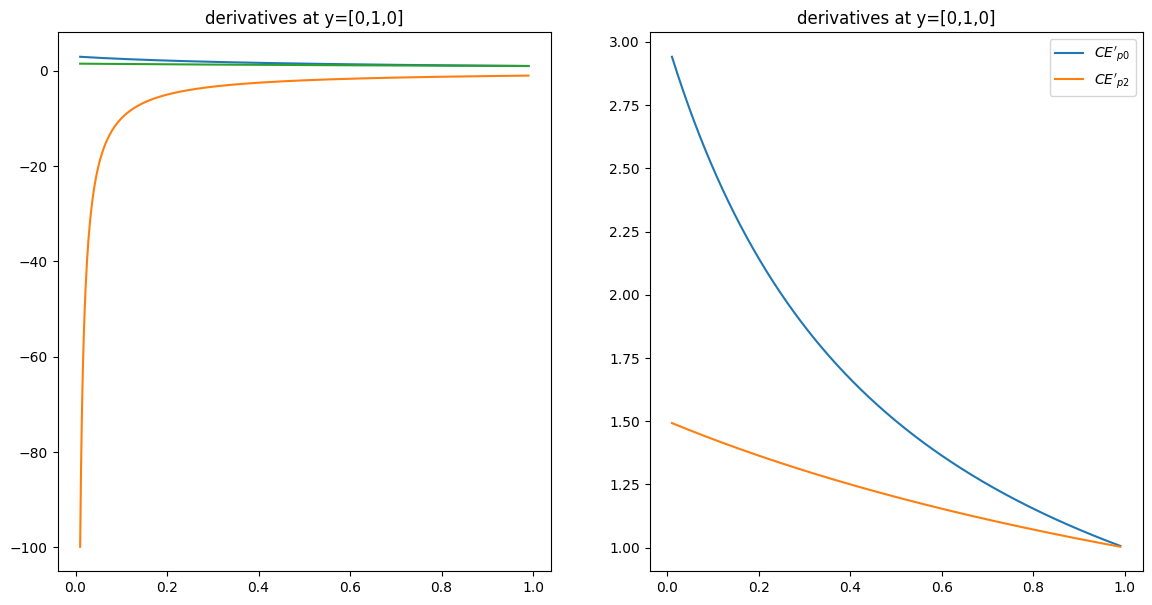

In [217]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
ax1.set_title('derivatives at y=[0,1,0]')
ax1.plot(ps[10:-10,:],pr[10:-10,0],label=r"$CE'_{p0}$")
ax1.plot(ps[10:-10,:],pr[10:-10,1],label=r"$CE'_{p1}$")
ax1.plot(ps[10:-10,:],pr[10:-10,2],label=r"$CE'_{p2}$")

ax2.set_title('derivatives at y=[0,1,0]')
ax2.plot(ps[10:-10,:],pr[10:-10,0],label=r"$CE'_{p0}$")
ax2.plot(ps[10:-10,:],pr[10:-10,2],label=r"$CE'_{p2}$")
plt.legend()

## Mean Squared Error

In [50]:
mse = MSE()

### Boston Housing

In [51]:
housing = HouseDatasetDownloader()
housing.load_dataset()

In [52]:
print(housing.description)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [53]:
print(housing.columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [54]:
print(housing.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [55]:
print(housing.data.shape)

(506, 14)


#### Correlations

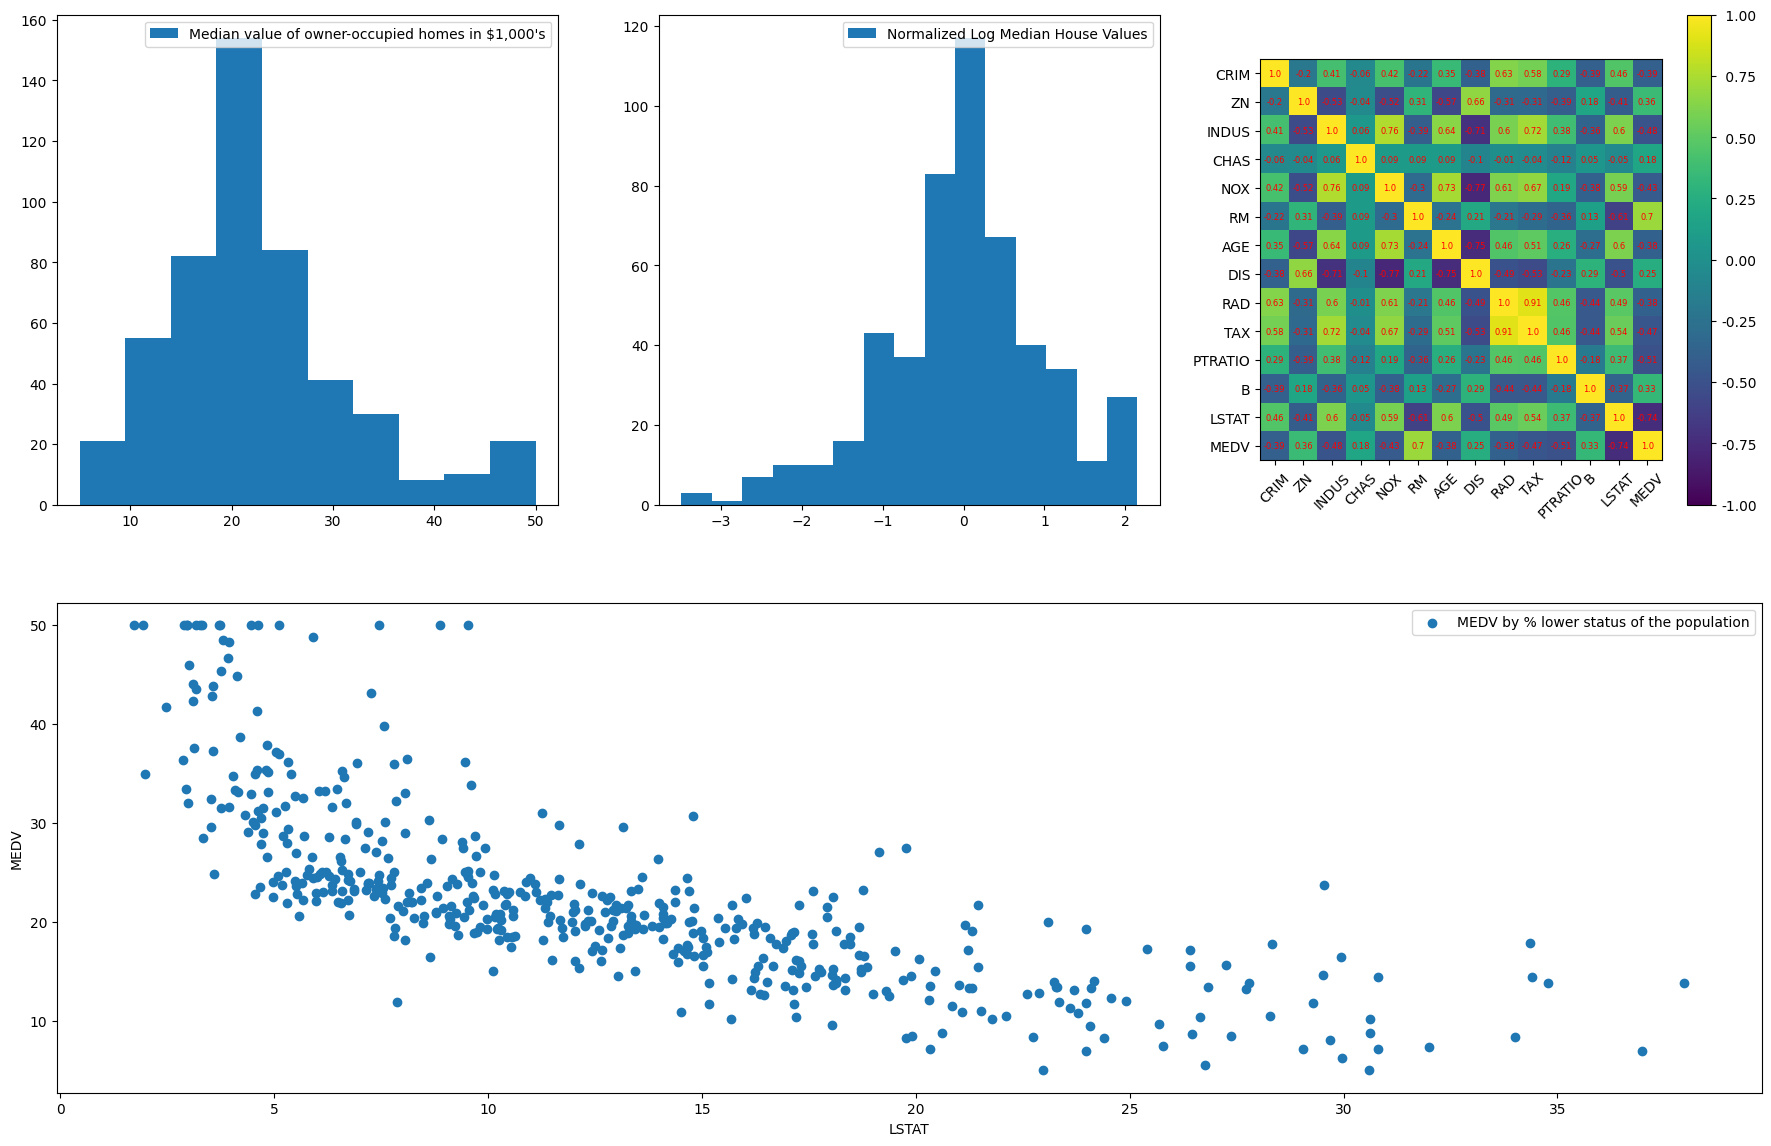

In [56]:

fig = plt.figure(figsize=(22,14))

gs  = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax4 = fig.add_subplot(gs[1, :])



ax1.hist(housing.data[:,-1],label="Median value of owner-occupied homes in $1,000's",bins=10)
ax1.legend()
ax2.hist(((lp:=numpy.log(housing.data[:,-1]))-lp.mean())/lp.std(),label='Normalized Log Median House Values',bins=15)
ax2.legend()
corr = Pearson(housing.data,cols=housing.columns)
corr.corr()
ax4.scatter(x=housing.data[:,-2],y=housing.data[:,-1],label='MEDV by % lower status of the population' )

ax4.set_xlabel("LSTAT")
ax4.set_ylabel("MEDV")
ax4.legend()

corr.heatmap(ax=ax3,digits=2)



#### Ordinary Least Squares

In [57]:
X = numpy.c_[housing.data[:,[-2]],numpy.ones((len(housing.data),1))]
y = housing.data[:,[-1]]
XtX = X.T.dot(X)
XTXinv = numpy.linalg.inv(XtX)  
βhat = XTXinv.dot(X.T.dot(y))

pred = X.dot(βhat)
ε = y-pred

sigmaε,meanε = ε.std(),ε.mean()
print(sigmaε,meanε)

Varβ = sigmaε**2 * XTXinv

βhat

6.20346413142642 -1.842355868215912e-14


array([[-0.95004935],
       [34.55384088]])

#### t-test

In [58]:
student = βhat/Varβ.diagonal().reshape(-1,1)**.5
student

array([[-24.57651813],
       [ 61.53688032]])

In [59]:
import scipy.stats 
  
p_value = scipy.stats.norm.sf(abs(student)) 
p_value

array([[1.12616355e-133],
       [0.00000000e+000]])

#### R2 score

In [60]:
SSE = (ε**2).sum()
SStot = ((y-y.mean())**2).sum()
R2 = 1 - SSE/SStot
R2

0.5441462975864797

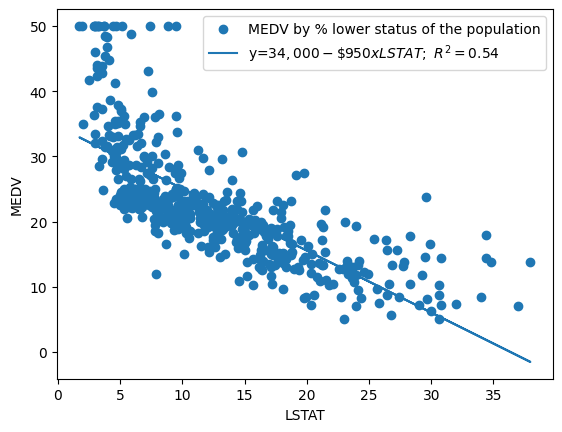

In [61]:
plt.scatter(x=housing.data[:,-2],y=housing.data[:,-1],label='MEDV by % lower status of the population' )
plt.plot(housing.data[:,-2],pred,label="y=$34,000 - \$950xLSTAT;\ R^{2}=$"+f'{R2:.2}')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()

#### Computing mse

In [62]:
mse = MSE()

In [63]:
mse.compute(y,pred)

38.48296722989415

In [64]:
mse.compute(y,y)

0.0

#### Residual Analysis

In [65]:
probs = numpy.linspace(0,1,100)
εquantiles = numpy.quantile(ε,probs)
theoratical = numpy.random.normal(loc=meanε,scale=sigmaε,size=10000)
normal_quantiles = numpy.quantile(theoratical,probs)

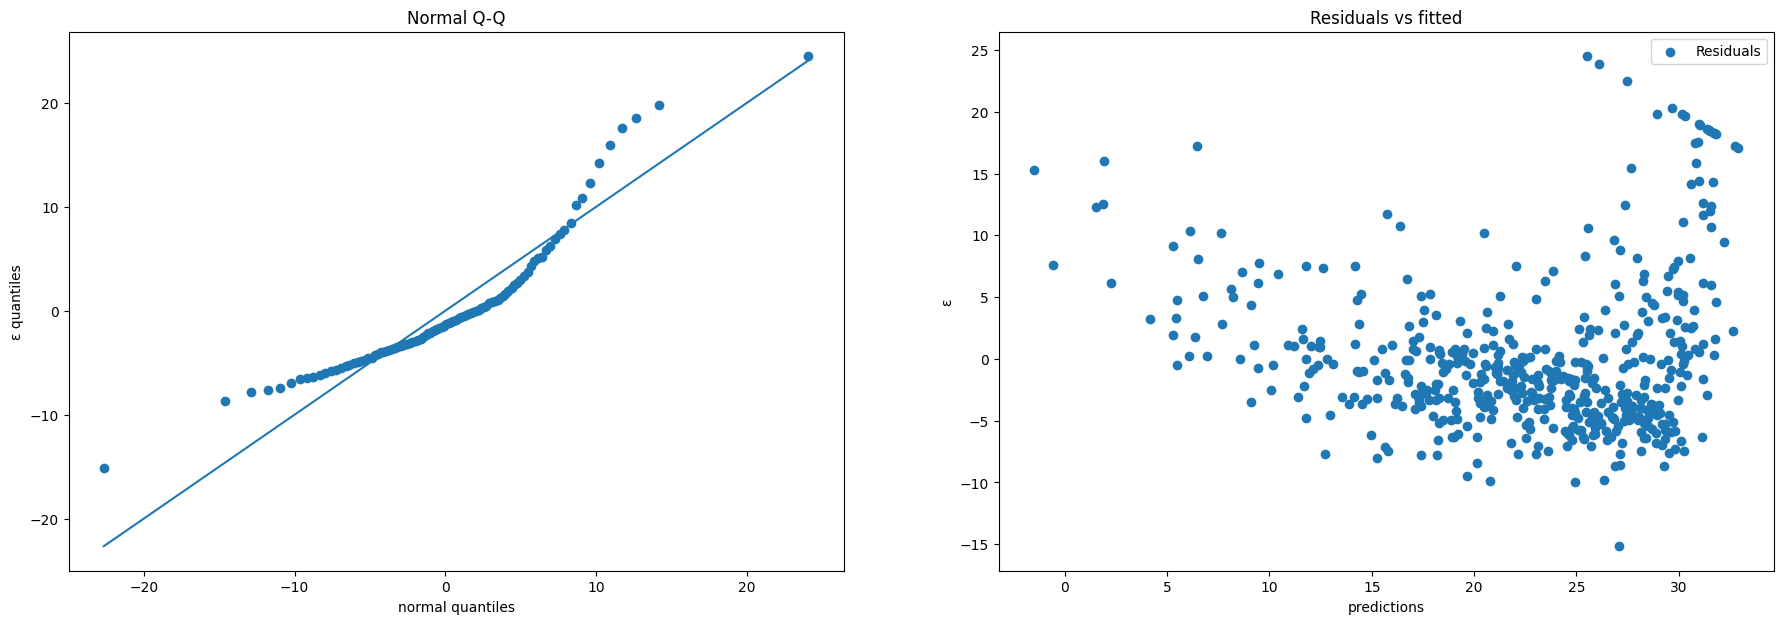

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,7))

ax1.scatter(normal_quantiles,εquantiles,label='Residual quantiles')
ax1.plot(normal_quantiles,normal_quantiles,label='theoratical normal')
ax1.set_title("Normal Q-Q")
ax1.set_xlabel("normal quantiles")
ax1.set_ylabel("ε quantiles")


ax2.scatter(pred,ε,label=r"Residuals")
ax2.set_title(r"Residuals vs fitted")
ax2.set_xlabel("predictions")
ax2.set_ylabel("ε")
ax2.legend()

#### Biais analysis

In [67]:
coeffs = []
for (x_new,y_new) in Boostrap((X,y),n_sample=1000):
    β_new = numpy.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T.dot(y_new))
    coeffs.append(β_new)

In [68]:
coeffs = numpy.concatenate(coeffs,axis=1).T

In [69]:
coeffs.mean(axis=0)

array([-0.95607794, 34.59180802])

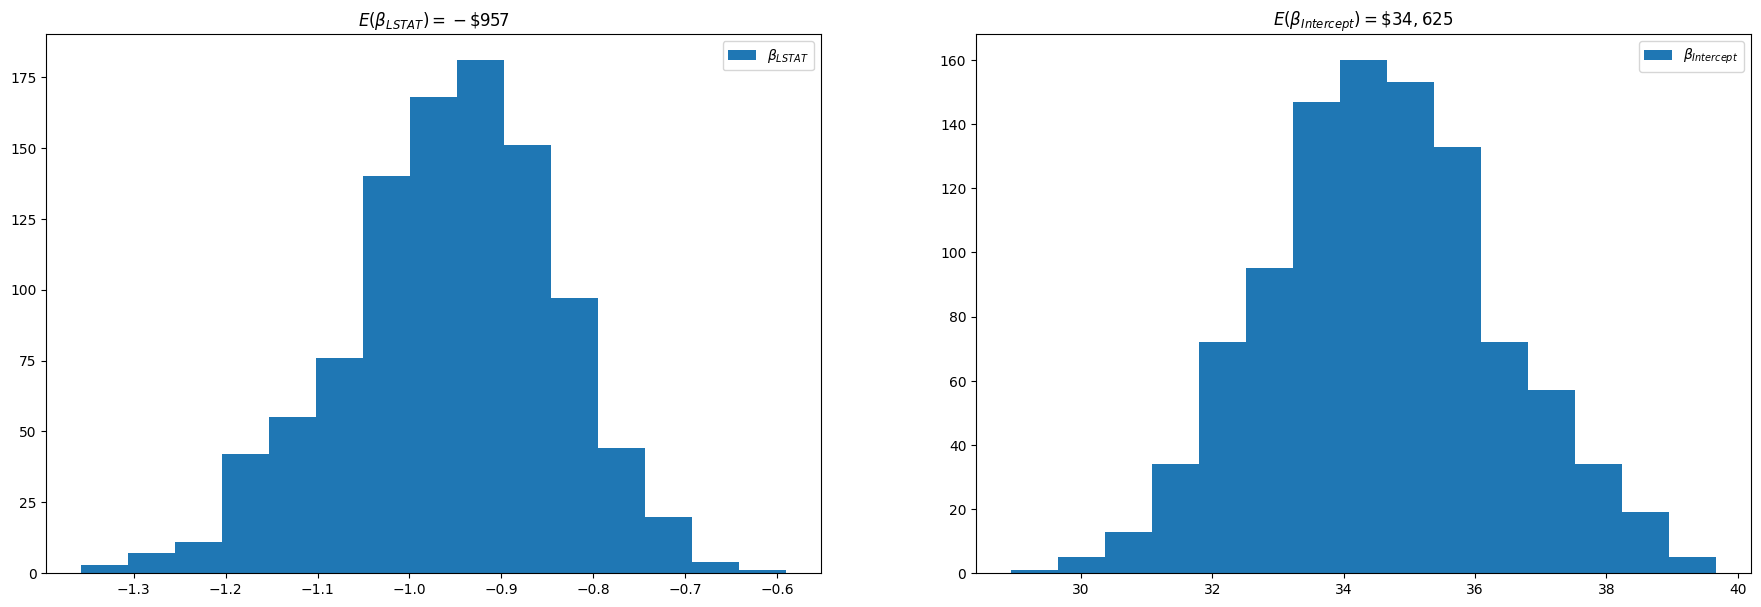

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,7))


ax1.hist(coeffs[:,0],label=r"$\beta_{LSTAT}$",bins=15)
ax1.set_title(r"$E(\beta_{LSTAT})=-\$957$")
ax1.legend()
ax2.hist(coeffs[:,1],label=r"$\beta_{Intercept}$",bins=15)
ax2.set_title(r"$E(\beta_{Intercept})=\$34,625$")
ax2.legend()


### Properties

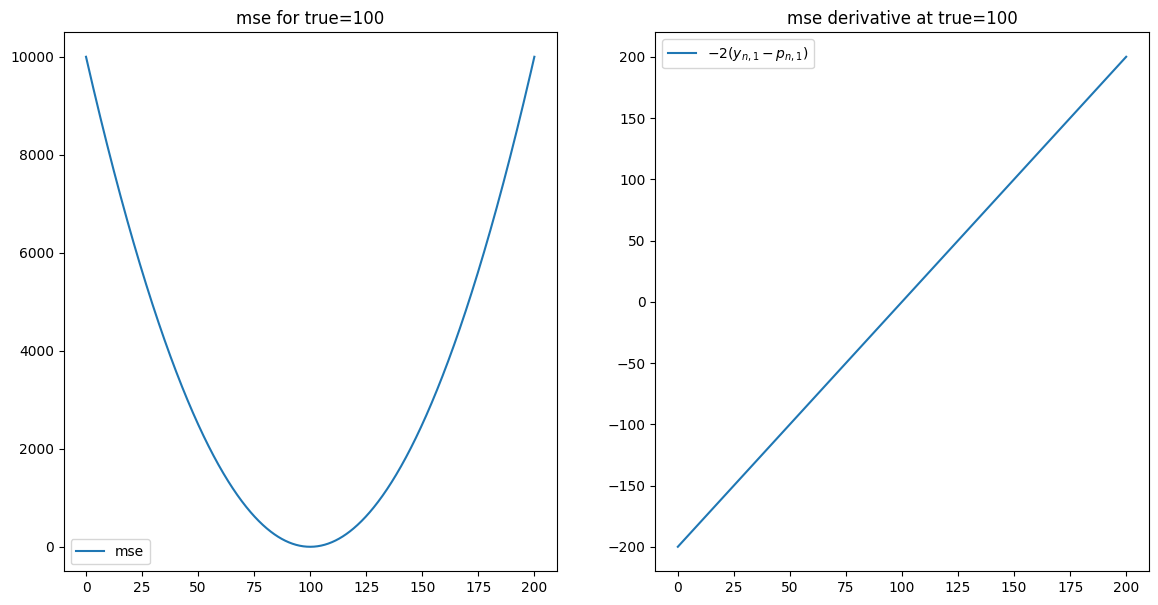

In [74]:
ps = numpy.linspace(0,200,1000).reshape(-1,1)

mses = numpy.array([ [mse.compute(numpy.array([100]),p),mse.pr()[0]] for p in ps ])

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
ax1.plot(ps,mses[:,0],label='mse')

ax1.set_title('mse for true=100')
ax1.legend()

ax2.plot(ps,mses[:,1],label=r'$-2(y_{n,1}-p_{n,1})$')
ax2.set_title('mse derivative at true=100')
ax2.legend()

# Backpropagation

In [22]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ
from neural_net.cost import BinaryCrossEntropy
from neural_net.utils import make_circle_data
import numpy
import matplotlib.pyplot as plt

In [2]:
network = Sequential(
        [
        Fullyconnected(2,10,zeros),
        Activation(σ),
        Fullyconnected(10,1,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy,store=True)

In [3]:
network['steps']

[Fullyconnected, Activation, Fullyconnected, Activation]

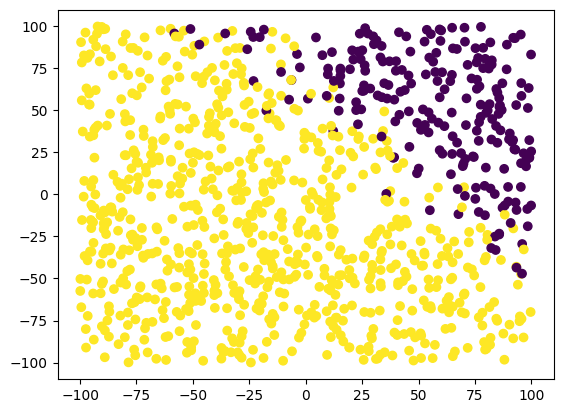

In [4]:
n,k = 1000,2
X = numpy.random.uniform(-100,100,size=(n,k))
y = (X.sum(axis=1) < numpy.random.uniform(30,90,(len(X),))).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [5]:
network.predict(X)
network.out.shape

(1000, 1)

In [6]:
network['cost']

BinaryCrossEntropy

In [7]:
network['cost'].compute(y,network.out)

0.6931471805599454

In [8]:
Δ0 = network['cost'].pr()
Δ0.shape

(1000, 1)

## Output Layer

In [9]:
network['steps'][-1]

Activation

In [10]:
Δ1 = network['steps'][-1].func.grad(Δ0)
Δ1.shape

(1000, 1)

## Last Linear Layer

In [11]:
network['steps'][-2]

Fullyconnected

In [12]:
Δ2 = network['steps'][-2].func.grad(Δ1)
Δ2.shape

(1000, 10)

In [13]:
%load_ext sql
%sql $network.db_path

## Update method

In [14]:
network.update(Δ0)

array([[ 0.34141679,  0.29918978],
       [ 0.34141679,  0.29918978],
       [-0.34141679, -0.29918978],
       ...,
       [ 0.34141679,  0.29918978],
       [ 0.34141679,  0.29918978],
       [ 0.34141679,  0.29918978]])

## View weights changes on db

In [19]:
network.updateW()
network.commit()

In [20]:
%%sql
SELECT *
from weight

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709931963.db
Done.


value,Neurons_id,id,created_at,updated_at,name,Weight_id
-0.9932124687481962,140158405172944,1,2024-03-08 21:06:03.650976,2024-03-08 21:07:12.085321,None,0_0
-0.9932124687481962,140158405172944,2,2024-03-08 21:06:03.650981,2024-03-08 21:07:12.085329,None,0_1
-0.9932124687481962,140158405172944,3,2024-03-08 21:06:03.650983,2024-03-08 21:07:12.085330,None,0_2
-0.9932124687481962,140158405172944,4,2024-03-08 21:06:03.650984,2024-03-08 21:07:12.085332,None,0_3
-0.9932124687481962,140158405172944,5,2024-03-08 21:06:03.650985,2024-03-08 21:07:12.085332,None,0_4
-0.9932124687481962,140158405172944,6,2024-03-08 21:06:03.650985,2024-03-08 21:07:12.085333,None,0_5
-0.9932124687481962,140158405172944,7,2024-03-08 21:06:03.650987,2024-03-08 21:07:12.085333,None,0_6
-0.9932124687481962,140158405172944,8,2024-03-08 21:06:03.650987,2024-03-08 21:07:12.085334,None,0_7
-0.9932124687481961,140158405172944,9,2024-03-08 21:06:03.650988,2024-03-08 21:07:12.085334,None,0_8
-0.9932124687481961,140158405172944,10,2024-03-08 21:06:03.650989,2024-03-08 21:07:12.085335,None,0_9


# Logistic Regression
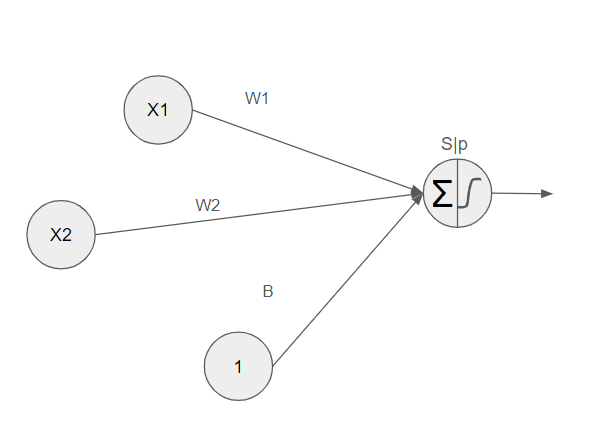

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ,Softmax
from neural_net.cost import BinaryCrossEntropy,CrossEntropy
from neural_net.utils import make_circle_data
import numpy
import matplotlib.pyplot as plt


(328, 2) (328, 1)


(-100.0, 100.0)

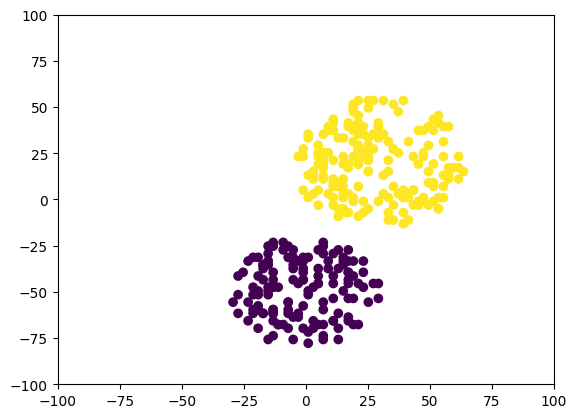

In [2]:
centers = [(-50, 0), (20, 30)]
radii = [30, 35]
X, y = make_circle_data(centers, radii)
print(X.shape, y.shape)
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

## Pure numpy definition

In [4]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((3,1))
X_const = numpy.c_[X,numpy.ones((len(X),1))]
H_θ(X_const,θ).shape

(328, 1)

## Using layers

In [5]:
LogReg = Sequential(
        [
        Fullyconnected(2,1,zeros),
        Activation(σ)
        ],
    BinaryCrossEntropy
    )
LogReg.predict(X).shape

(328, 1)

In [6]:
LogReg['steps'][-2].func.W

array([[0.],
       [0.],
       [0.]])

## Computing Gradients

### Analytic gradient
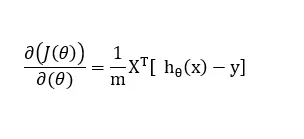

In [7]:
J = lambda θ,X : 1/len(X)*X.T.dot(H_θ(X,θ)-y)
J(θ,X_const)

array([[ -8.2471052 ],
       [-15.8967726 ],
       [ -0.07317073]])

### Chain rule logistic Regression

In [8]:
%%HTML
  <iframe
      src="https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/25%20-%20LogisticRegression.pdf"
      width="100%"
      height="600px"
      loading="lazy"
      title="PDF-file"
  ></iframe>



In [9]:
LogReg["cost"].compute(y,LogReg.out)
p0 =  LogReg["cost"].pr()
p1 = LogReg["steps"][-1].func.grad(p0)
p2 = LogReg["steps"][-2].func.grad(p1)

In [10]:
-LogReg["steps"][-2].func.W

array([[ -8.2471052 ],
       [-15.8967726 ],
       [ -0.07317073]])

# Softmax Regression( j target class in {1,..,k} and m=1,..,n instances)

$$
{\displaystyle \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{i=1}^{K}\mathrm {e} ^{z_{i}}}}}
$$

## Analytical gradient

In [11]:
from neural_net.pipeline import onehot

In [12]:
y_one_hot = onehot(y)
y_one_hot[:5,:]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [13]:
W = numpy.zeros((X.shape[1]+1,2))
W

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
W = numpy.zeros((X.shape[1],2))
Sm = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
Sm(W,X)[:5,:]

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [15]:
J = 1/len(X)*X.T.dot(Sm(W,X)-y_one_hot)
J

array([[  8.2471052,  -8.2471052],
       [ 15.8967726, -15.8967726]])

### Chain rule

In [16]:
softmax = Sequential(
        [
        Fullyconnected(2,2,zeros),
        Activation(Softmax)
        ],
    CrossEntropy
    )
softmax.predict(X)[:5,:]

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [17]:
softmax["cost"].compute(y_one_hot,softmax.out)

0.6931471805599453

In [18]:
softmax["cost"].compute(y_one_hot,softmax.out)
_ = softmax.update(softmax["cost"].pr())
-softmax["steps"][-2].func.W

array([[ -8.2471052 ,   8.2471052 ],
       [-15.8967726 ,  15.8967726 ],
       [ -0.07317073,   0.07317073]])

# Training

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ,Softmax
from neural_net.cost import BinaryCrossEntropy,CrossEntropy
from neural_net.utils import make_circle_data,IrisDatasetDownloader
from neural_net.metrics import accuracy
from neural_net.pipeline import onehot
import numpy
import matplotlib.pyplot as plt

(328, 2) (328, 1)


(-100.0, 100.0)

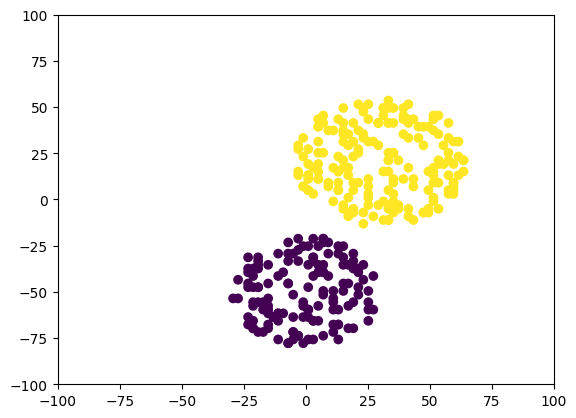

In [2]:
centers = [(-50, 0), (20, 30)]
radii = [30, 35]
X, y = make_circle_data(centers, radii)
print(X.shape, y.shape)
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

## Logistic Regression

In [3]:
n_epoch = 1000
α = 0.1

### Using analytical gradient

In [4]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((3,1))
X_const = numpy.c_[X,numpy.ones((len(X),1))]
J = lambda θ,X : 1/len(X)*X.T.dot(H_θ(X,θ)-y)

In [5]:
for _ in range(n_epoch):
    θ -= α*J(θ,X_const)

In [6]:
θ

array([[1.19524694],
       [1.47756754],
       [0.05197856]])

In [7]:
pred = (H_θ(X_const,θ) > .5 )+0


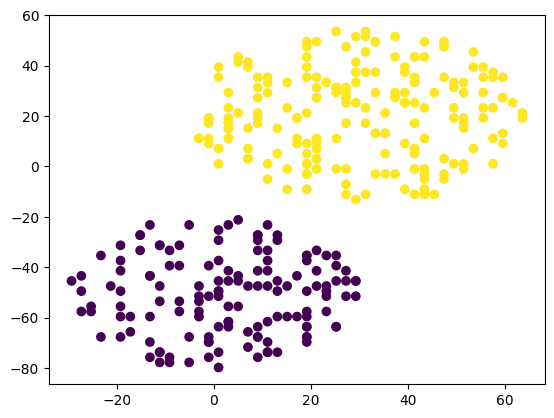

In [8]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

### Using chain rule

In [9]:
LogReg = Sequential(
        [
        Fullyconnected(2,1,zeros),
        Activation(σ)
        ],
    BinaryCrossEntropy
    )
for _ in range(n_epoch):
    LogReg.predict(X)
    LogReg["cost"].compute(y,LogReg.out)
    LogReg["cost"].compute(y,LogReg.out)
    _ = LogReg.update(α*LogReg["cost"].pr())

In [10]:
LogReg['steps'][-2].func.W

array([[1.19524694],
       [1.47756754],
       [0.05197856]])

In [11]:
p = (LogReg.out>.5)+0

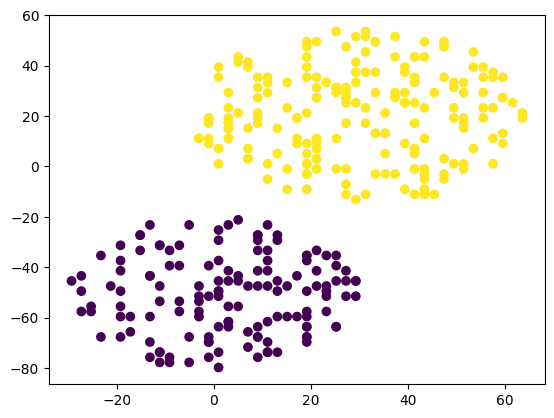

In [12]:
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### Using train method

In [15]:
LogReg = Sequential(
        [
        Fullyconnected(2,1,zeros),
        Activation(σ)
        ],
    BinaryCrossEntropy
    )
LogReg.train(X,y,epochs=n_epoch,α=α,metrics=accuracy)

BinaryCrossEntropy 0.0002 accuracy 1.0: 100%|██████████| 1000/1000 [00:03<00:00, 298.57it/s]


In [16]:
LogReg['steps'][-2].func.W

array([[1.19524694],
       [1.47756754],
       [0.05197856]])

## Softmax

### 2 labels

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ,Softmax
from neural_net.cost import BinaryCrossEntropy,CrossEntropy
from neural_net.utils import make_circle_data,IrisDatasetDownloader
from neural_net.metrics import accuracy
from neural_net.pipeline import onehot
import numpy
import matplotlib.pyplot as plt

(328, 2) (328, 2)


(-100.0, 100.0)

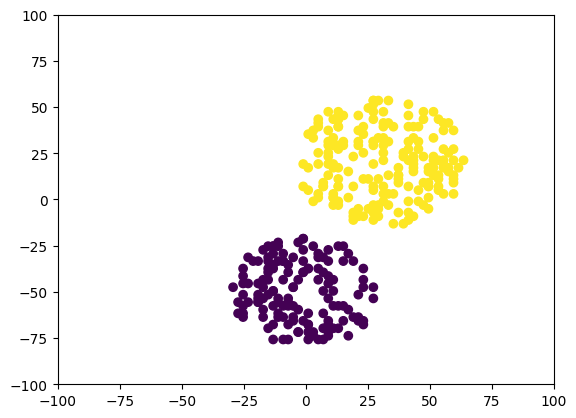

In [2]:
centers = [(-50, 0), (20, 30)]
radii = [30, 35]
X, y = make_circle_data(centers, radii)
y = onehot(y)
print(X.shape, y.shape)
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1],c=y.argmax(axis=1))
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

In [3]:
n_epoch = 1000
α = 0.1

#### Analytically

In [4]:
n,k=X.shape
j=y.shape[1]

In [5]:
W = numpy.zeros((k+1,j))
Sm = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Sm(W,X)-y)

for _ in range(n_epoch):
    W -= α*J_W(W,numpy.c_[X,numpy.ones((n,1))] )

In [6]:
W

array([[-1.07789341,  1.07789341],
       [-1.56804297,  1.56804297],
       [-0.02426586,  0.02426586]])

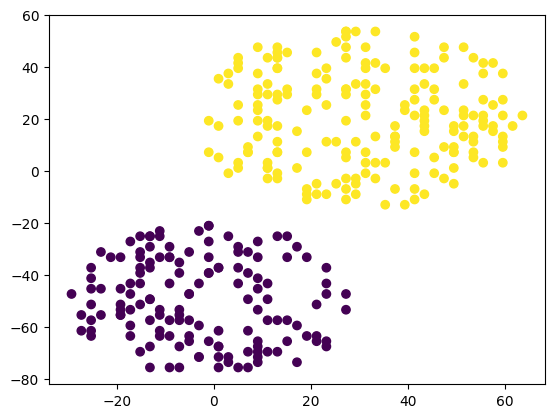

In [7]:
p = Sm(W,numpy.c_[X,numpy.ones((n,1))]).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

#### using chain rule

In [8]:
softmax = Sequential(
        [
        Fullyconnected(k,j,zeros),
        Activation(Softmax)
        ],
    CrossEntropy
    )
softmax.train(X,y,epochs=n_epoch,α=α,metrics=accuracy)

CrossEntropy 0.0001 accuracy 1.0: 100%|██████████| 1000/1000 [00:03<00:00, 282.21it/s]


In [9]:
softmax['steps'][-2].func.W

array([[-1.07789341,  1.07789341],
       [-1.56804297,  1.56804297],
       [-0.02426586,  0.02426586]])

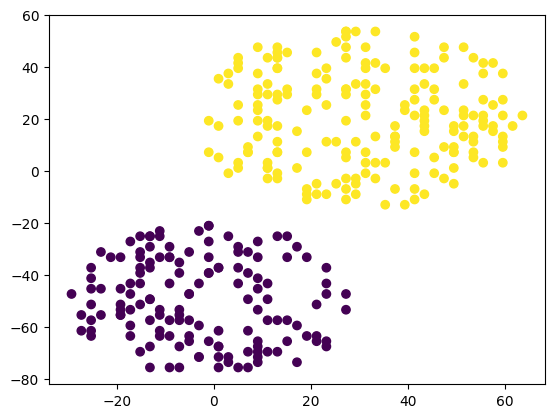

In [10]:
p = softmax.predict(X).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### 3 labels

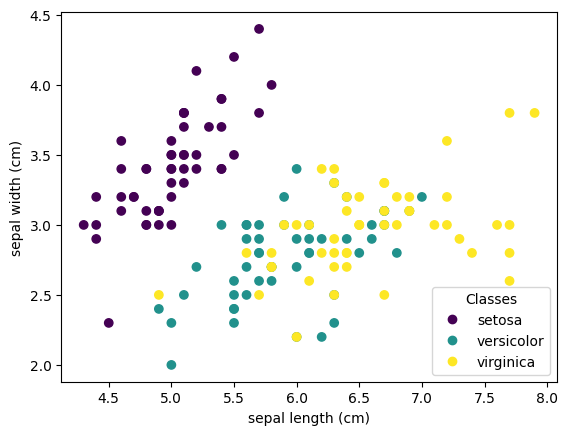

In [11]:
iris = IrisDatasetDownloader()
iris.load_dataset()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [12]:
X,y = iris.data,onehot(iris.target)
n,k = X.shape
j = y.shape[1]
X.shape,y.shape

((150, 4), (150, 3))

#### Using Softmax analytical solution

In [23]:
n_epoch=1000

In [24]:
W = numpy.zeros((k+1,j))
Sm = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Sm(W,X)-y)

for _ in range(n_epoch):
    W -= α*J_W(W,numpy.c_[X,numpy.ones((n,1))]) 

In [25]:
W

array([[ 0.88907029,  0.7230017 , -1.612072  ],
       [ 2.05504822, -0.20042131, -1.85462692],
       [-2.81867225, -0.13349788,  2.95217013],
       [-1.32033636, -1.14715458,  2.46749093],
       [ 0.42390714,  0.65830856, -1.0822157 ]])

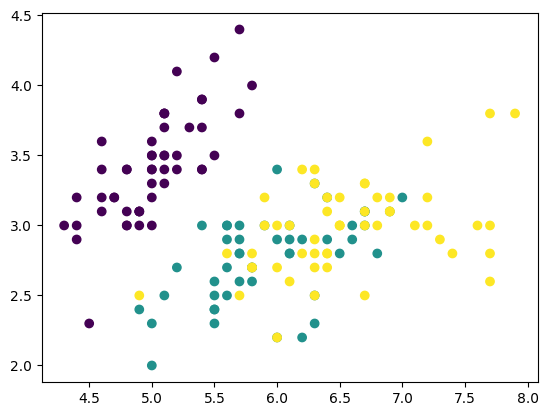

In [28]:
p = Sm(W,numpy.c_[X,numpy.ones((n,1))]).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p) 

In [29]:
accuracy().compute(y,Sm(W,numpy.c_[X,numpy.ones((n,1))]))

0.9867

#### Chain rule

In [30]:
softmax = Sequential(
        [
        Fullyconnected(k,j,zeros),
        Activation(Softmax)
        ],
    CrossEntropy
    )
softmax.train(X,y,epochs=n_epoch,α=α,metrics=accuracy)

CrossEntropy 0.126 accuracy 0.9867: 100%|██████████| 1000/1000 [00:03<00:00, 318.95it/s]


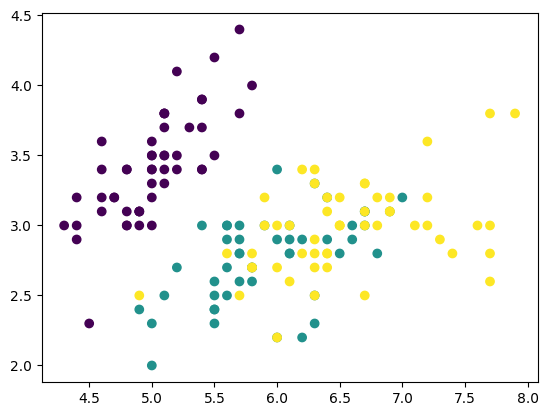

In [31]:
p = softmax.predict(X).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Non Linear Problems

In [4]:
import numpy

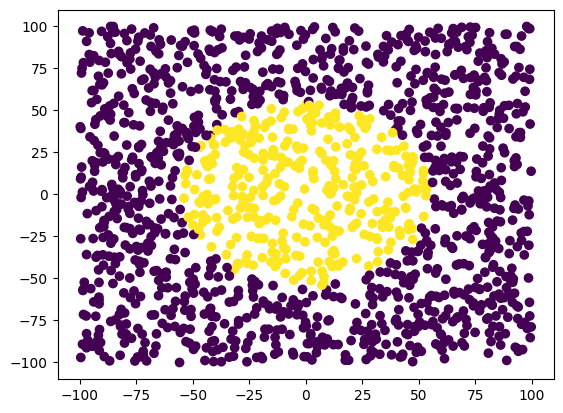

In [5]:
n,k = 1500,2
X = numpy.random.uniform(-100,100,size=(n,k))
y =( (X[:, 0]**2 + X[:, 1]**2) < 3000).reshape(-1,1)+0
y_one_hot = onehot(y)
plt.scatter(x=X[:,0],y=X[:,1],c=y)

# Beyond linear architecture

In [9]:
n_epoch = 1000
α = 0.2

## Logistic regression

In [178]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((3,1))
X_const = numpy.c_[X,numpy.ones((len(X),1))]
J = lambda θ,X : 1/len(X)*X.T.dot(H_θ(X,θ)-y)
for _ in range(n_epoch):
    θ -= α*J(θ,X_const)

In [179]:
pred = (H_θ(X_const,θ) > .5 )+0


In [180]:
(pred==y).sum()/len(y)

0.49066666666666664

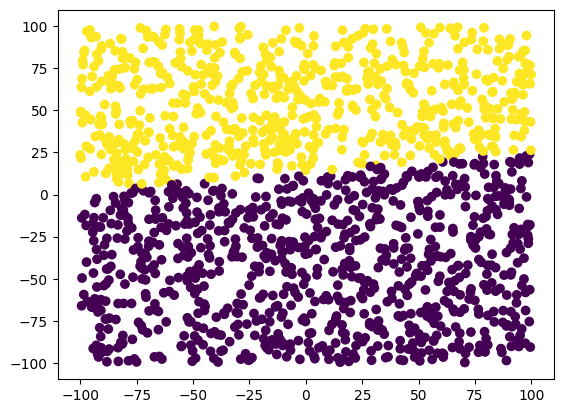

In [181]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

## Softmax

In [182]:
y_one_hot = onehot(y)
n,j= y_one_hot.shape
(n,j)

(1500, 2)

In [183]:
W = numpy.zeros((k+1,j))
Sm = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Sm(W,X)-y_one_hot)

for _ in range(n_epoch):
    W -= α*J_W(W,X_const) 

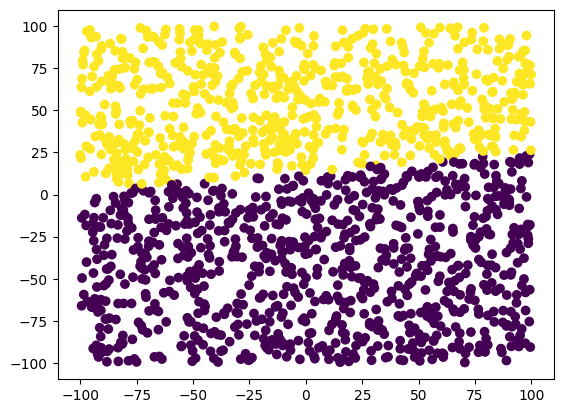

In [184]:
p = Sm(W,X_const).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p) 

# Neural network

In [6]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros,XavierHe
from neural_net.activation import σ,Softmax,LeakyReLU,Tanh,ELU,ReLU
from neural_net.cost import BinaryCrossEntropy,CrossEntropy
from neural_net.metrics import accuracy
from neural_net.pipeline import onehot,scaler,shuffle,Batch
from neural_net.utils import IrisDatasetDownloader
import numpy
import matplotlib.pyplot as plt

## Xavier and He Initialization methods

We don’t want the signal to die out, nor do we want it to explode and saturate.

For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs


In [11]:
NN = Sequential(
        [
        Fullyconnected(2,50,XavierHe("Uniform","ReLU").init_func),
        Activation(LeakyReLU),     
        Fullyconnected(50,1,XavierHe("Uniform","Sigmoid").init_func),
        Activation(σ)
        ],
    BinaryCrossEntropy
    )

In [12]:
NN.train(scaler(X),y,α=α,epochs=n_epoch,metrics=accuracy)

BinaryCrossEntropy 0.0721 accuracy 0.994: 100%|██████████| 1000/1000 [00:17<00:00, 56.29it/s]


In [13]:
pred = (NN.predict(scaler(X))>.5)+0
pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

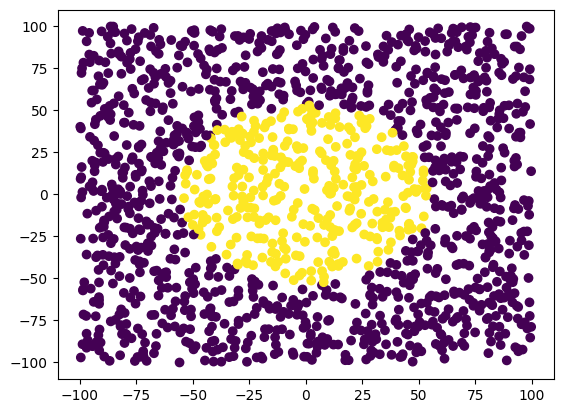

In [14]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

In [15]:
NN.train(scaler(X),y,α=α,epochs=n_epoch,metrics=accuracy)

BinaryCrossEntropy 0.0463 accuracy 0.996: 100%|██████████| 1000/1000 [00:19<00:00, 51.83it/s]


## Iris Problem

In [16]:
iris = IrisDatasetDownloader()
iris.load_dataset()
y = onehot(iris.target)
X = iris.data

X,y = shuffle(X,y)
n,k = X.shape
j = y.shape[1]

In [82]:
NN = Sequential(
        [
        Fullyconnected(k,100,XavierHe("Uniform","ReLU").init_func),
        Activation(LeakyReLU),  
        Fullyconnected(100,50,XavierHe("Normal","ReLU").init_func),
        Activation(ELU),  
        Fullyconnected(50,j,zeros),
        Activation(Softmax)
        ],
    CrossEntropy
    )

In [83]:
batch = Batch(60,len(X),lambda : scaler(X), lambda : y)
NN.train(batch=batch,α=0.2,epochs=1000,metrics=accuracy)

CrossEntropy 0.001 accuracy 1.0: 100%|██████████| 1000/1000 [00:32<00:00, 30.43it/s]  


In [84]:
pred = NN.predict(scaler(X)).argmax(axis=1,keepdims=True)

In [85]:
true_y = y.argmax(axis=1,keepdims=True)

In [86]:
(pred == true_y).sum()/len(pred)

1.0

## Storing weights

In [88]:
from neural_net.model import Define
Define._Define__store = True

In [89]:
NN.updateW()

In [95]:
NN.commit()

In [96]:
NN.db_path

'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709981118.db'

In [97]:
from sqlalchemy import text
import pandas
cursor = NN.engines.get(NN.db_path).connect()
res = cursor.execute(text('''

        SELECT * 
        FROM
        Weight

'''))
pandas.DataFrame(res.fetchall())

,value,Neurons_id,id,created_at,updated_at,name,Weight_id
0,-0.003729,139694848570384,1,2024-03-09 11:08:51.902537,2024-03-09 11:08:51.902543,None,0_0
1,-0.384036,139694848570384,2,2024-03-09 11:08:51.902544,2024-03-09 11:08:51.902545,None,0_1
2,0.033767,139694848570384,3,2024-03-09 11:08:51.902545,2024-03-09 11:08:51.902546,None,0_2
3,0.265035,139694848570384,4,2024-03-09 11:08:51.902546,2024-03-09 11:08:51.902547,None,0_3
4,0.261001,139694848570384,5,2024-03-09 11:08:51.902547,2024-03-09 11:08:51.902548,None,0_4
...,...,...,...,...,...,...,...
196,-0.207245,139694847460432,197,2024-03-09 11:08:51.902896,2024-03-09 11:08:51.902896,None,46_0
197,-0.108507,139694847460432,198,2024-03-09 11:08:51.902896,2024-03-09 11:08:51.902897,None,47_0
198,-0.229139,139694847460432,199,2024-03-09 11:08:51.902897,2024-03-09 11:08:51.902898,None,48_0
199,0.260771,139694847460432,200,2024-03-09 11:08:51.902899,2024-03-09 11:08:51.902899,None,49_0


# Optical character recognition(OCR)

## Hand written dataset

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

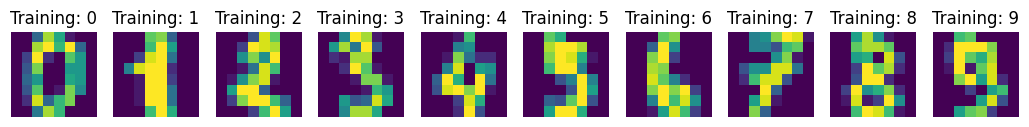

In [11]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(13, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, onehot(digits.target.reshape(-1,1)), test_size=0.5, shuffle=False
)

In [13]:
X_train.shape,y_train.shape

((898, 64), (898, 10))

### Softmax

In [15]:
softmax = Sequential(
        [
        Fullyconnected(64,10,zeros),
        Activation(Softmax)
        ],
    CrossEntropy
    )
softmax.train(X_train,y_train,epochs=1000,α=0.001,metrics=accuracy)

CrossEntropy 0.1366 accuracy 0.9811: 100%|==========| 1000/1000 [00:25<00:00, 39.08it/s]


In [349]:
predicted = softmax.predict(X_test).argmax(axis=1)

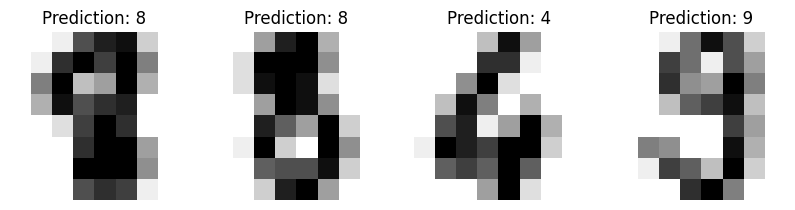

In [350]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [351]:
print(
    f"Classification report for classifier :\n"
    f"{classification_report(y_test.argmax(axis=1), predicted)}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        88
           1       0.93      0.84      0.88        91
           2       1.00      0.97      0.98        86
           3       0.94      0.85      0.89        91
           4       0.97      0.91      0.94        92
           5       0.89      0.93      0.91        91
           6       0.93      0.99      0.96        91
           7       0.96      0.99      0.97        89
           8       0.89      0.90      0.89        88
           9       0.83      0.96      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[85  0  0  0  1  1  1  0  0  0]
 [ 0 76  0  1  2  1  1  0  0 10]
 [ 0  0 83  3  0  0  0  0  0  0]
 [ 0  2  0 77  0  3  0  4  5  0]
 [ 0  0  0  0 84  0  4  0  3  1]
 [ 0  0  0  0  0 85  1  0  0  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  3  0  0  0  4  0  0 79  2]
 [ 0  0  0  1  0  2  0  0  1 88]]


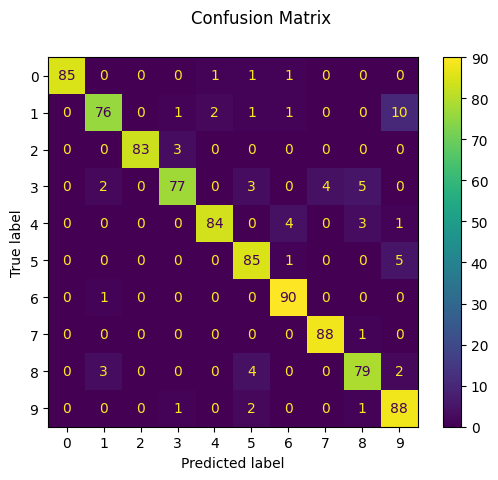

In [352]:
disp = ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Deep Learning

In [400]:
NN = Sequential(
        [
        Fullyconnected(64,1000,XavierHe("Normal","ReLU").init_func),
        Activation(ELU),  
        Fullyconnected(1000,100,XavierHe("Normal","ReLU").init_func),
        Activation(ELU),  
        Fullyconnected(100,10,XavierHe("Normal","Sigmoid").init_func),
        Activation(Softmax)
        ],
    CrossEntropy
    )

In [401]:
X_train,y_train = shuffle(X_train,y_train)
batch = Batch(10,len(X_train),lambda : X_train/16, lambda : y_train)
NN.train(batch=batch,α=0.014,epochs=100,metrics=accuracy)

CrossEntropy 0.0117 accuracy 1.0: 100%|██████████| 100/100 [00:42<00:00,  2.35it/s]


In [402]:
predicted = NN.predict(X_test/16).argmax(axis=1)

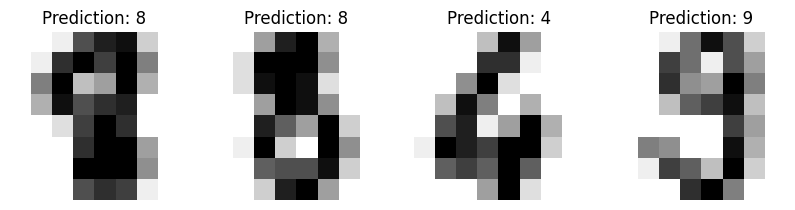

In [403]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [404]:
print(
    f"Classification report for classifier :\n"
    f"{classification_report(y_test.argmax(axis=1), predicted)}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.95      0.91      0.93        91
           2       0.99      1.00      0.99        86
           3       0.97      0.86      0.91        91
           4       0.98      0.92      0.95        92
           5       0.91      0.95      0.92        91
           6       0.95      0.99      0.97        91
           7       0.96      0.96      0.96        89
           8       0.92      0.92      0.92        88
           9       0.85      0.97      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899




## Mnist

In [7]:
from keras.datasets import mnist

2024-03-09 13:59:33.278357: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 13:59:33.373835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

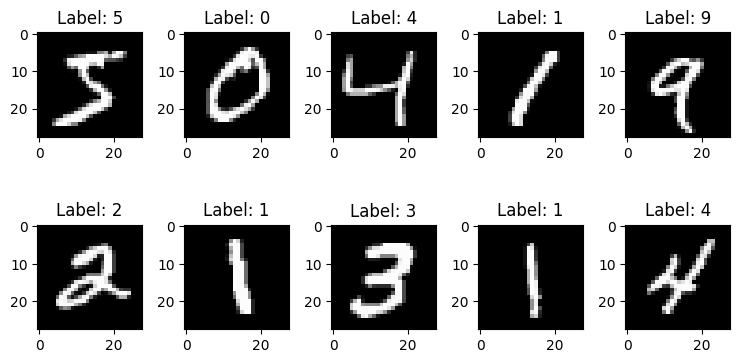

In [46]:
num = 10
images = X_train[:num]
labels = Y_train[:num]
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [47]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train /= 255
X_test /= 255

In [48]:
X_train.shape

(60000, 784)

In [49]:
Y_train = onehot(Y_train.reshape(-1,1))
Y_train.shape, Y_test.shape

((60000, 10), (10000,))

In [38]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [39]:
NN = Sequential(
        [
        Fullyconnected(n_inputs,n_hidden1,XavierHe("Normal","ReLU").init_func),
        Activation(LeakyReLU),  
        Fullyconnected(n_hidden1,n_hidden2,XavierHe("Normal","ReLU").init_func),
        Activation(LeakyReLU),  
        Fullyconnected(n_hidden2,n_outputs,XavierHe("Normal","Sigmoid").init_func),
        Activation(Softmax)
        ],
    CrossEntropy
    )

In [40]:
batch = Batch(500,len(X_train),lambda : X_train, lambda : Y_train)
NN.train(batch=batch,α=0.014,epochs=100,metrics=accuracy)

CrossEntropy 0.129 accuracy 0.976: 100%|==========| 100/100 [10:28<00:00,  6.28s/it]


In [43]:
pred = NN.predict(X_test).argmax(axis=1)

In [44]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [50]:
print(
    f"Classification report for classifier :\n"
    f"{classification_report(Y_test, pred)}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


